# Job Offer Acceptance Prediction


## Section A: Data Collection and Extraction

### Importing necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

%matplotlib inline

### Merging the Data

In [2]:
#Read the data from excel for each worksheet
df_application=pd.read_excel('HR-Records_Final.xlsx',1)
df_candidate=pd.read_excel('HR-Records_Final.xlsx',3)
df_interview=pd.read_excel('HR-Records_Final.xlsx',5)

#Merge the data based on Candidate ID
df=pd.merge(df_application,df_candidate, how="inner", on='Candidate ID')
df=pd.merge(df,df_interview,how="inner", on='Candidate ID')

In [3]:

# Code to view all columns 
pd.set_option('display.max_columns',None)
df.head()


,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,LOB,Joining location,Candidate relocation status,Acceptance status,Notice period,Current CTC,Current gross salary,Current organization,Highest Educational Degree,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Gender,Candidate source,DOB,Location,Number of precious jobs,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,B2,1.383755e+06,0.190383,58122.28125,IT,NCR,Yes,Joined,0,1162445.625,1033285,IBM,Diploma,8,7.2,2012,1500000,0.290383,M,Direct,1991-11-06,Kolkata,2,2020-05-29,4,2020-06-03,2020-06-12,General,Online,40,25
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,B4,2.976590e+06,0.332342,111705.13125,Manufacturing,NCR,Yes,Offer Rejected,0,2234102.625,1985869,Mahindra,Diploma,15,13.5,2005,3200000,0.432342,M,Agency,1984-02-22,Pune,4,2020-05-31,2,2020-06-05,2020-06-08,Managerial,FaceToFace,40,40
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,B0,7.416631e+05,0.271345,29168.43750,IT,Chennai,No,Joined,30,583368.750,518550,Infosys,Diploma,4,3.6,2016,800000,0.371345,M,Direct,1995-03-27,Chennai,1,2020-05-15,3,2020-05-20,2020-05-26,Technical,Online,45,60
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,C6,4.079724e+06,0.273813,160138.23750,Finance,Hyderabad,No,Offer Rejected,60,3202764.750,2846902,JP Morgun,Diploma,20,18.0,2000,4400000,0.373813,M,Direct,1979-06-14,Hyderabad,6,2020-05-10,1,2020-05-15,2020-05-15,Technical,Written,40,40
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,B5,3.340936e+06,0.289619,129531.88125,IT,Mumbai,Yes,Joined,15,2590637.625,2302789,HCL,Diploma,17,15.3,2003,3600000,0.389619,M,Employee referral,1982-11-26,Hyderabad,5,2020-01-11,4,2020-01-16,2020-01-25,Technical,Online,15,25


In [4]:
#Checking the types of variables present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Candidate ID                     200 non-null    object        
 1   Date of Application              200 non-null    datetime64[ns]
 2   Date of Interview                200 non-null    datetime64[ns]
 3   Date of Job Offer                200 non-null    datetime64[ns]
 4   Date of Offer extension          200 non-null    datetime64[ns]
 5   Date of Joining                  200 non-null    datetime64[ns]
 6   Offered band                     200 non-null    object        
 7   Offered Salary                   200 non-null    float64       
 8   Percentage hike offered (CTC)    200 non-null    float64       
 9   Joining bonus amount             200 non-null    float64       
 10  LOB                              200 non-null    object       

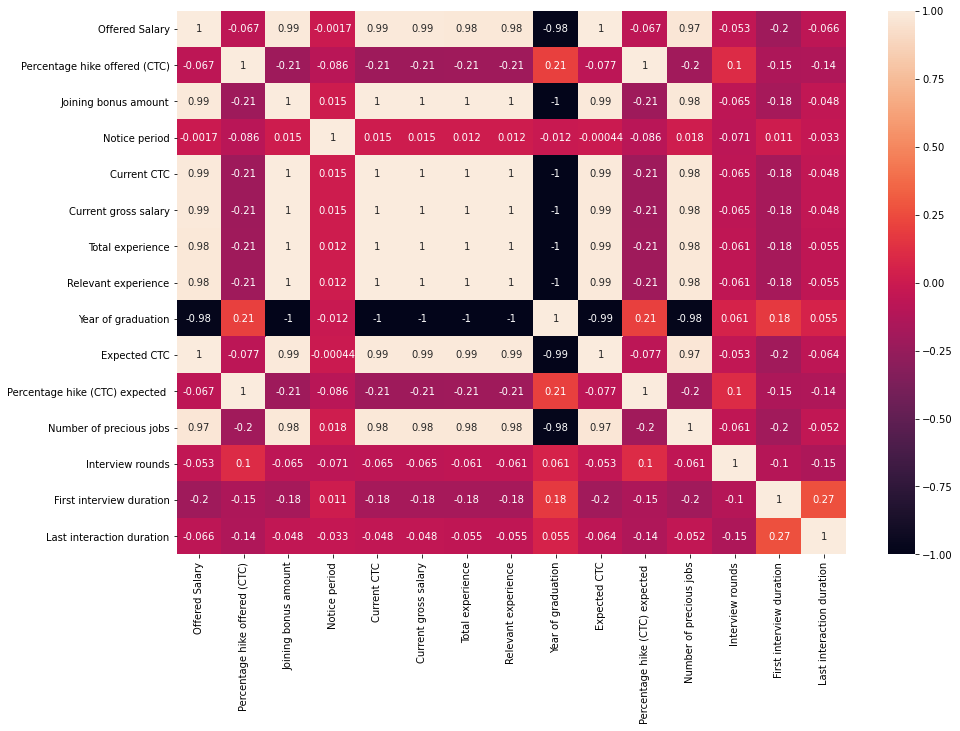

In [5]:
#Checking for correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()


<b>Correlation between Numerical variables can be observed using heatmaps</b> <br>
Each of features 
'Offered Salary',
'Expected CTC',
'Current CTC',
'Current Gross Salary',
'Total Experience',
'Relevant Experience',
'No. of previous jobs',
'joining bonus amount' 
have high positive correlation amongst each other and all these features have a high negative correlation with the feature 'Year of graduation' <br>


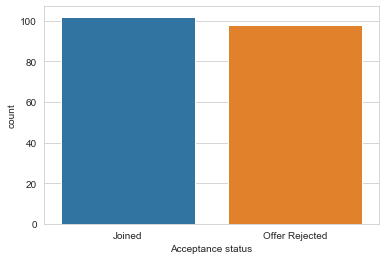

In [6]:
# Plotting a countplot 
sns.set_style("whitegrid")
sns.countplot(x='Acceptance status', data=df)

<b>Countplot of the target variable</b> <br>
The countplot shows that the dataset given has an almost even distribution of Candidates who have Accepted the job offer and those who have rejected </br>

### List of potential attributes


<b>1.Derived features</b> <br>
01. Application review duration = Written Test Date - Date of Application
02. Interview duration = Date of Job Offer - Written Test Date
03. Notice period difference = Notice period - (Date of Joining - Date of Job Offer)
04. CTC difference = Offered Salary - Current CTC
05. Age = Current Date - DOB
06. Hike difference = Percentage hike offered (CTC) - Percentage hike (CTC) expected -- Not significant since the value is almost same for all.

<b>2.Necessary features for model building</b> <br>
01. Review Duration (derived feature)
02. Interview Duration (derived feature)
03. Days Difference (derived feature) 
04. CTC Difference (derived feature)
05. Offer - Extension - need to derive a numeric from this field
06. Offered band
07. Percentage hike offered (CTC)
08. Joining bonus amount
09. LOB
10. Candidate relocation status
11. Notice period
12. Current CTC
13. Current gross salary
14. Current organization
15. Total experience
16. Relevant experience
17. Gender
18. Candidate source
19. Number of precious jobs
20. Interview rounds
21. Interview types
22. Interview Types2
</br>

# Section B: Pre-processing Data

### Missing Data 

In [7]:
# check for null values
df.isnull().sum()  

Candidate ID                       0
Date of Application                0
Date of Interview                  0
Date of Job Offer                  0
Date of Offer extension            0
Date of Joining                    0
Offered band                       0
Offered Salary                     0
Percentage hike offered (CTC)      0
Joining bonus amount               0
LOB                                0
Joining location                   0
Candidate relocation status        0
Acceptance status                  0
Notice period                      0
Current CTC                        0
Current gross salary               0
Current organization               0
Highest Educational Degree         0
Total experience                   0
Relevant experience                0
Year of graduation                 0
Expected CTC                       0
Percentage hike (CTC) expected     0
Gender                             0
Candidate source                   0
DOB                                0
L

<b>There is no need for Data Imputation as the dataset is complete with no missing values</b>

### Derivation of New Features 

In [8]:
# Creating Derived Features 
df['Review Duration'] = (df['Written Test Date'] - df['Date of Application']).apply(lambda x: x.days)
df['Interview Duration'] = (df['Date of Job Offer'] - df['Written Test Date']).apply(lambda x: x.days)
df['Days Difference'] = (df['Notice period'] - (df['Date of Joining'] - df['Date of Job Offer']).apply(lambda x: x.days))
df['Hike Difference'] = (df['Percentage hike offered (CTC)'] - df['Percentage hike (CTC) expected '])
df['CTC Difference'] = (df['Offered Salary'] - df['Current CTC'])
now = pd.Timestamp('now')
df['Age'] = (now - df['DOB']).astype('<m8[Y]')




### Descriptive Statistics

In [9]:
# describing the data
df.describe() 

,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Number of precious jobs,Interview rounds,First interview duration,Last interaction duration,Review Duration,Interview Duration,Days Difference,Hike Difference,CTC Difference,Age
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,2.346565e+06,0.270672,92967.280031,31.275000,1.859346e+06,1.652752e+06,12.280000,11.052000,2007.720000,2.532500e+06,0.370672,3.575000,2.485000,35.700000,35.1250,185.760000,19.455000,-10.450000,-1.000000e-01,4.872198e+05,34.545000
std,1.095181e+06,0.087131,43718.606470,22.038098,8.743721e+05,7.772197e+05,5.242041,4.717837,5.242041,1.181556e+06,0.087131,1.728965,1.125214,14.397794,14.7631,76.790535,3.375641,6.328328,1.214309e-16,2.718177e+05,5.411506
min,4.609491e+05,0.109940,18048.881250,0.000000,3.609776e+05,3.208690e+05,3.000000,2.700000,2000.000000,5.000000e+05,0.209940,1.000000,1.000000,15.000000,15.0000,10.000000,15.000000,-22.000000,-1.000000e-01,7.044024e+04,24.000000
25%,1.396196e+06,0.194058,52955.339063,15.000000,1.059107e+06,9.414282e+05,7.750000,6.975000,2003.000000,1.500000e+06,0.294058,2.000000,1.000000,25.000000,25.0000,131.750000,15.000000,-7.000000,-1.000000e-01,2.771841e+05,30.000000
50%,2.414243e+06,0.275515,96949.490625,30.000000,1.938990e+06,1.723546e+06,12.000000,10.800000,2008.000000,2.600000e+06,0.375515,4.000000,3.000000,40.000000,30.0000,191.500000,21.000000,-7.000000,-1.000000e-01,4.165839e+05,34.000000
75%,3.317921e+06,0.340090,133375.598438,45.000000,2.667512e+06,2.371122e+06,17.000000,15.300000,2012.250000,3.600000e+06,0.440090,5.000000,3.000000,45.000000,45.0000,242.000000,21.000000,-7.000000,-1.000000e-01,6.910937e+05,39.000000
max,4.568679e+06,0.491772,167622.243750,60.000000,3.352445e+06,2.979951e+06,20.000000,18.000000,2017.000000,4.900000e+06,0.591772,6.000000,4.000000,60.000000,60.0000,353.000000,24.000000,-7.000000,-1.000000e-01,1.255467e+06,45.000000


### Outlier Detection 

In [10]:

#Numerical and categorical variables for model building
numerical =['Offered Salary','Percentage hike offered (CTC)','Joining bonus amount','Notice period','Current CTC','Current gross salary','Total experience','Relevant experience','Year of graduation','Expected CTC','Number of precious jobs','Interview rounds','First interview duration','Last interaction duration','Review Duration','Interview Duration','CTC Difference','Age']
categorical = ['Offered band', 'LOB', 'Joining location', 'Candidate relocation status', 'Current organization', 'Highest Educational Degree', 'Gender', 'Candidate source', 'Location', 'Interview types', 'Interview Types2']


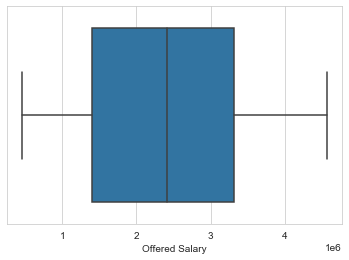

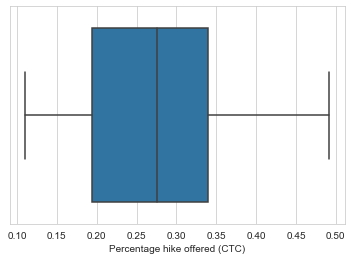

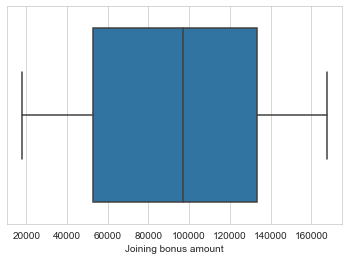

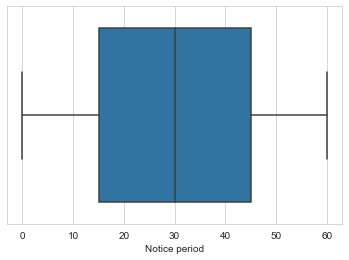

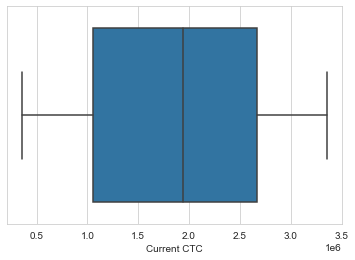

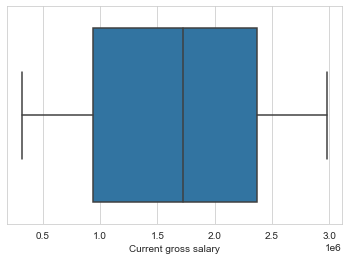

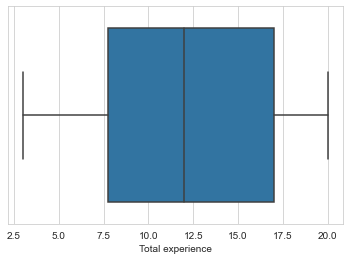

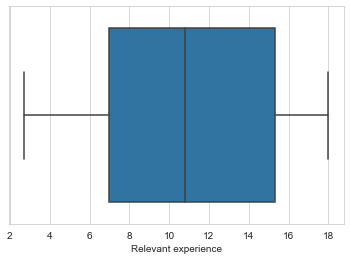

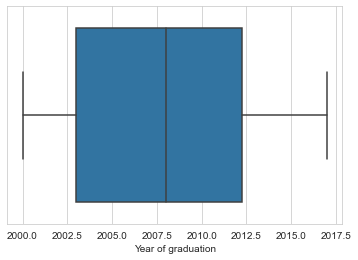

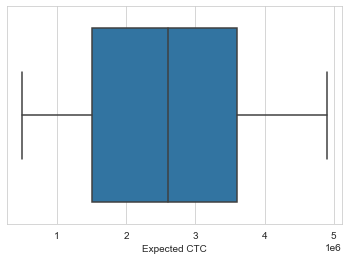

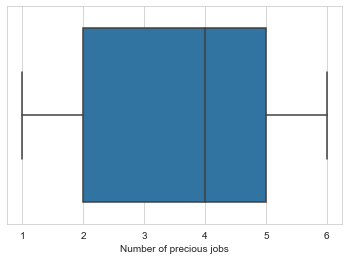

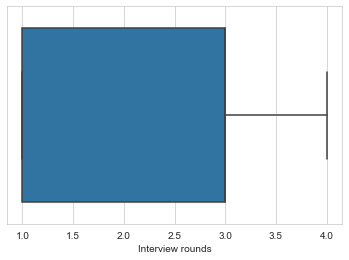

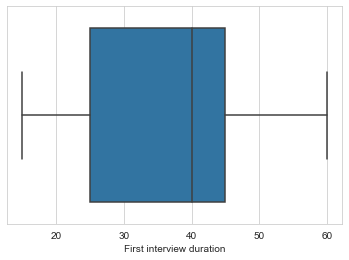

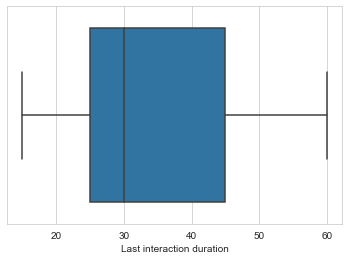

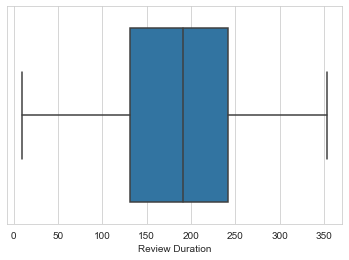

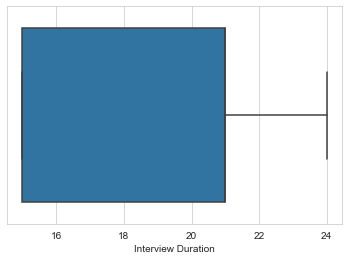

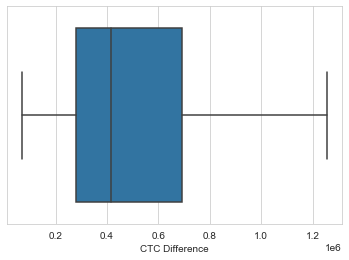

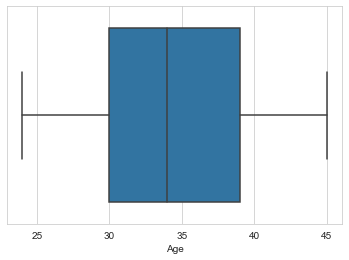

<Figure size 432x288 with 0 Axes>

In [11]:
for i in range(len(numerical)):
    sns.boxplot(x=df[numerical[i]])
    plt.figure()

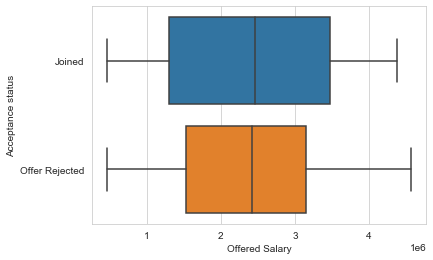

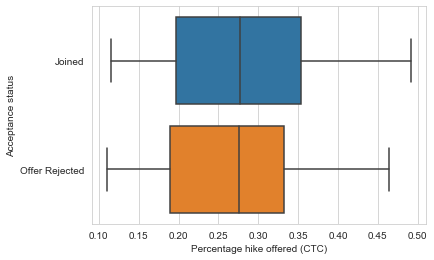

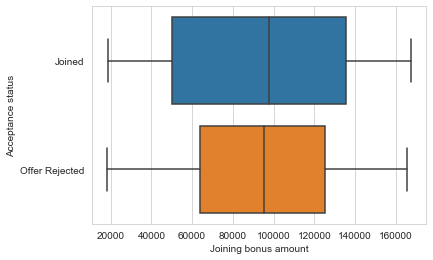

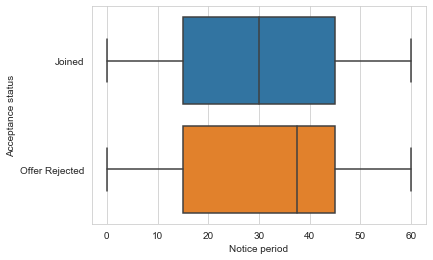

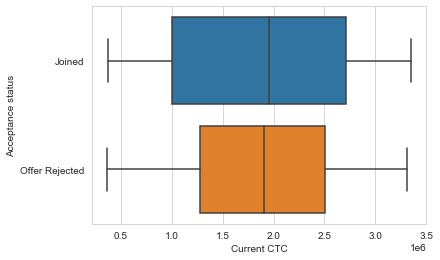

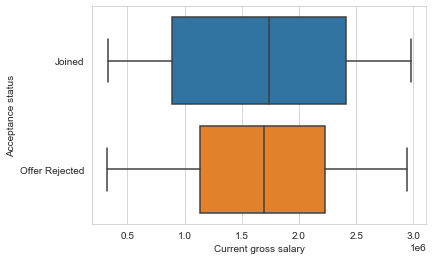

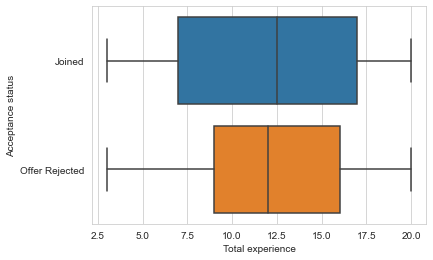

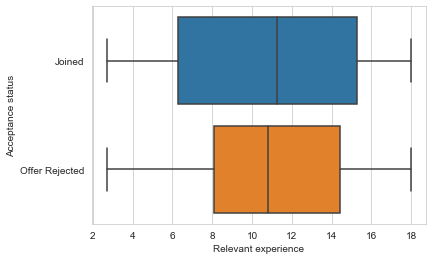

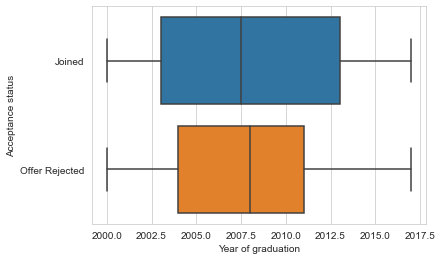

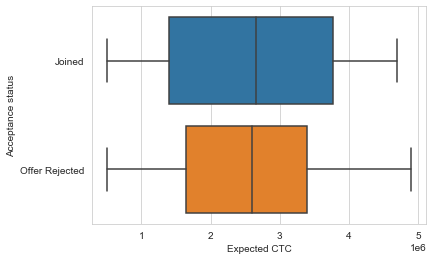

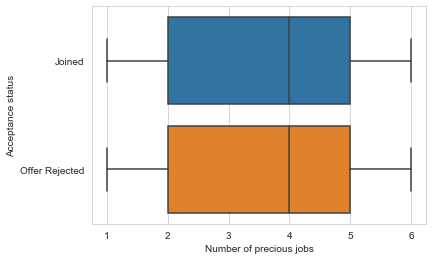

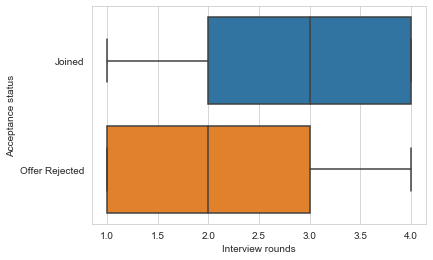

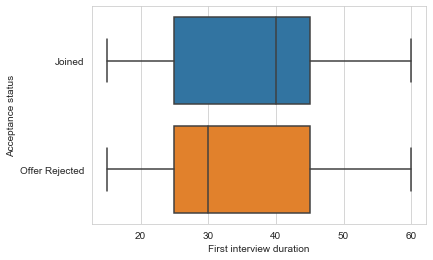

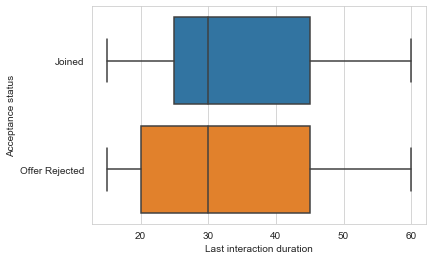

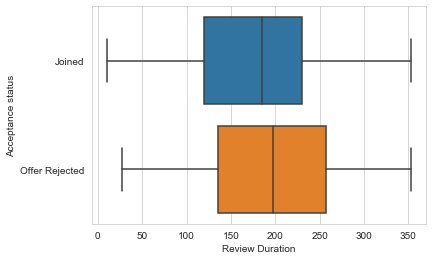

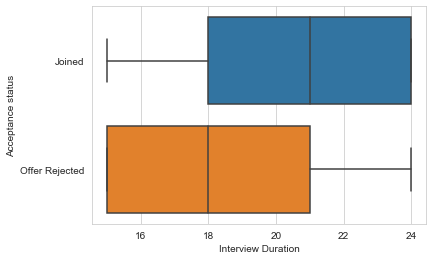

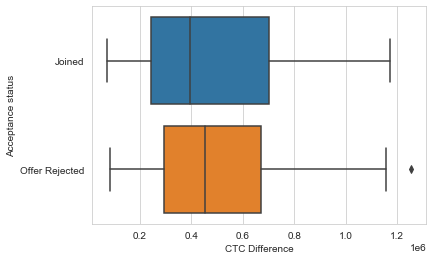

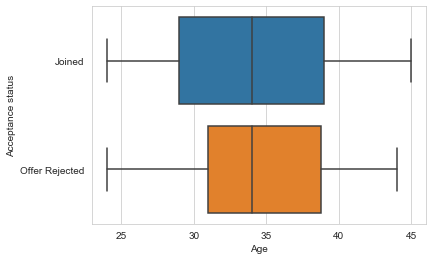

<Figure size 432x288 with 0 Axes>

In [12]:
for i in range(len(numerical)):
    sns.boxplot(x=df[numerical[i]] ,y=df['Acceptance status'],data= df)
    plt.figure()

<b> Boxplot of all numeric variables </b>
<br>
Two Sets of Box plots are generated based on the numerical data. First set displays the distribution of the numerical data and the second set displays the distribution of the numerical data with respect to the 'Acceptance Status'. As shown by all the boxplots our dataset does not have any outliers. The features 'Interview Rounds' and 'Interview Duration' show skewness </br>

### Categorical Feature Conversion

In [13]:
# Generating dummy variable for Features 
data_dum = pd.get_dummies(df, columns = categorical)
# Generating dummy variable for Target variable
data_dum = pd.get_dummies(data_dum, columns = ['Acceptance status'])
data_dum.head()

,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,DOB,Number of precious jobs,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,First interview duration,Last interaction duration,Review Duration,Interview Duration,Days Difference,Hike Difference,CTC Difference,Age,Offered band_B0,Offered band_B1,Offered band_B2,Offered band_B3,Offered band_B4,Offered band_B5,Offered band_C6,LOB_Finance,LOB_IT,LOB_Manufacturing,Joining location_Chennai,Joining location_Hyderabad,Joining location_Mumbai,Joining location_NCR,Joining location_Pune,Candidate relocation status_No,Candidate relocation status_Yes,Current organization_Accenture,Current organization_Bajaj Finance,Current organization_Bank Of America,Current organization_CSE,Current organization_Cognizant,Current organization_HCL,Current organization_HSBC,Current organization_IBM,Current organization_Infosys,Current organization_JP Morgun,Current organization_L & T,Current organization_Mahindra,Current organization_Oracle,Current organization_TCS,Current organization_Tech Mahindra,Highest Educational Degree_Bachelors,Highest Educational Degree_Diploma,Highest Educational Degree_Master,Gender_F,Gender_M,Candidate source_Agency,Candidate source_Direct,Candidate source_Employee referral,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurugram,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Mysore,Location_Noida,Location_Pune,Interview types_General,Interview types_Managerial,Interview types_Technical,Interview Types2_FaceToFace,Interview Types2_Online,Interview Types2_Written,Acceptance status_Joined,Acceptance status_Offer Rejected
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,1.383755e+06,0.190383,58122.28125,0,1162445.625,1033285,8,7.2,2012,1500000,0.290383,1991-11-06,2,2020-05-29,4,2020-06-03,2020-06-12,40,25,275,24,-22,-0.1,221309.8125,29.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,2.976590e+06,0.332342,111705.13125,0,2234102.625,1985869,15,13.5,2005,3200000,0.432342,1984-02-22,4,2020-05-31,2,2020-06-05,2020-06-08,40,40,185,18,-22,-0.1,742487.1125,36.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,7.416631e+05,0.271345,29168.43750,30,583368.750,518550,4,3.6,2016,800000,0.371345,1995-03-27,1,2020-05-15,3,2020-05-20,2020-05-26,45,60,278,21,-7,-0.1,158294.3750,25.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,4.079724e+06,0.273813,160138.23750,60,3202764.750,2846902,20,18.0,2000,4400000,0.373813,1979-06-14,6,2020-05-10,1,2020-05-15,2020-05-15,40,40,266,15,-7,-0.1,876958.7750,41.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,3.340936e+06,0.289619,129531.88125,15,2590637.625,2302789,17,15.3,2003,3600000,0.389619,1982-11-26,5,2020-01-11,4,2020-01-16,2020-01-25,15,25,127,24,-7,-0.1,750298.6125,38.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0


In [14]:
#Gender_F and Gender_M, Candidate relocation status_No and Candidate relocation status_Yes, Acceptance status_Joined and Acceptance status_Offer Rejected
#conveyed the same information so we kept 1 column of each
df_dum = data_dum.drop(['Candidate relocation status_No','Gender_M','Acceptance status_Offer Rejected'],axis = 1)
df_dum.head()

,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,DOB,Number of precious jobs,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,First interview duration,Last interaction duration,Review Duration,Interview Duration,Days Difference,Hike Difference,CTC Difference,Age,Offered band_B0,Offered band_B1,Offered band_B2,Offered band_B3,Offered band_B4,Offered band_B5,Offered band_C6,LOB_Finance,LOB_IT,LOB_Manufacturing,Joining location_Chennai,Joining location_Hyderabad,Joining location_Mumbai,Joining location_NCR,Joining location_Pune,Candidate relocation status_Yes,Current organization_Accenture,Current organization_Bajaj Finance,Current organization_Bank Of America,Current organization_CSE,Current organization_Cognizant,Current organization_HCL,Current organization_HSBC,Current organization_IBM,Current organization_Infosys,Current organization_JP Morgun,Current organization_L & T,Current organization_Mahindra,Current organization_Oracle,Current organization_TCS,Current organization_Tech Mahindra,Highest Educational Degree_Bachelors,Highest Educational Degree_Diploma,Highest Educational Degree_Master,Gender_F,Candidate source_Agency,Candidate source_Direct,Candidate source_Employee referral,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurugram,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Mysore,Location_Noida,Location_Pune,Interview types_General,Interview types_Managerial,Interview types_Technical,Interview Types2_FaceToFace,Interview Types2_Online,Interview Types2_Written,Acceptance status_Joined
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,1.383755e+06,0.190383,58122.28125,0,1162445.625,1033285,8,7.2,2012,1500000,0.290383,1991-11-06,2,2020-05-29,4,2020-06-03,2020-06-12,40,25,275,24,-22,-0.1,221309.8125,29.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,2.976590e+06,0.332342,111705.13125,0,2234102.625,1985869,15,13.5,2005,3200000,0.432342,1984-02-22,4,2020-05-31,2,2020-06-05,2020-06-08,40,40,185,18,-22,-0.1,742487.1125,36.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,7.416631e+05,0.271345,29168.43750,30,583368.750,518550,4,3.6,2016,800000,0.371345,1995-03-27,1,2020-05-15,3,2020-05-20,2020-05-26,45,60,278,21,-7,-0.1,158294.3750,25.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,4.079724e+06,0.273813,160138.23750,60,3202764.750,2846902,20,18.0,2000,4400000,0.373813,1979-06-14,6,2020-05-10,1,2020-05-15,2020-05-15,40,40,266,15,-7,-0.1,876958.7750,41.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,3.340936e+06,0.289619,129531.88125,15,2590637.625,2302789,17,15.3,2003,3600000,0.389619,1982-11-26,5,2020-01-11,4,2020-01-16,2020-01-25,15,25,127,24,-7,-0.1,750298.6125,38.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1


<b> Categorical variables were pre-processed using dummy variables </b><br>
Columns which comprised of the same information were dropped. 

The value '1' indicates:

01. Candidate is a female in the Gender Column 
02. Candidate has relocated in Relocation Status Column
03. Candiate has Joined the company in the Acceptance Status Column
    
The value '0' indicates:
01. Candidate is a male in the Gender Column 
02. Candidate has not relocated in Relocation Status Column
03. Candiate has Rejected the company in the Acceptance Status Column
    </br>


# Section C: Descriptive Analysis

### Generation of various charts

Categorical variables = Offered band, LOB ,Joining location, Candidate relocation status, Acceptance status, Current organization <br>
Highest Educational Degree, Gender,Candidate source, Location, Interview types, Interview Types2 <br>


<b> Plotting of countplots </b><br>
For each of the categorical variables, a bar chart of the variable, with an overlay of the target variable is constructed. </br>

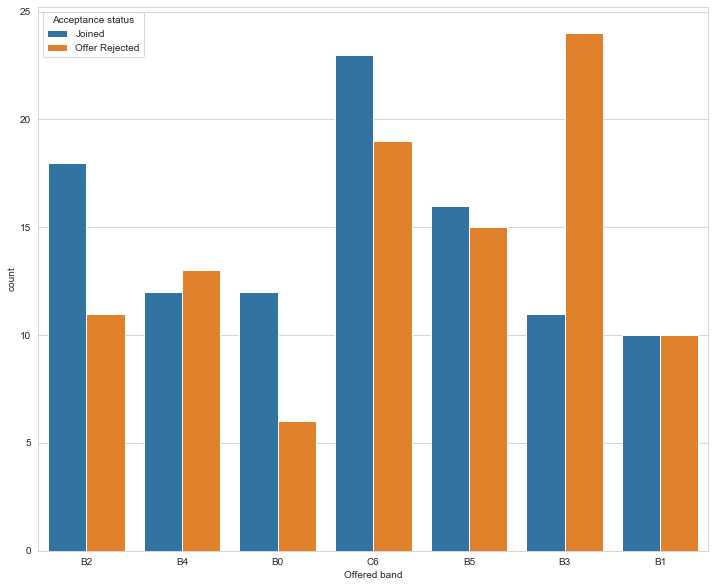

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
sns.countplot(x='Offered band', hue='Acceptance status', data=df)

Band B3 has high number of rejections and Band C6 has the highest number of candidates who have joined

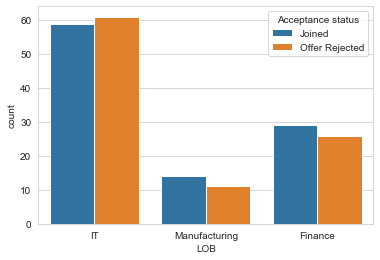

In [16]:
sns.set_style("whitegrid")
sns.countplot(x='LOB', hue='Acceptance status', data=df)

Acceptance and rejection ratio in Manufactring and Finance seems to be same, where as in IT there are more rejections than accptance. Most of our dataset has people from the IT line of business

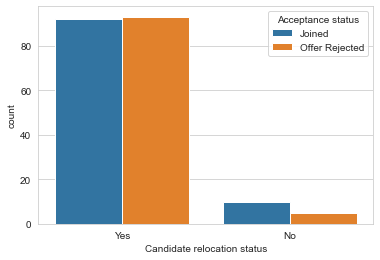

In [17]:
sns.set_style("whitegrid")
sns.countplot(x='Candidate relocation status', hue='Acceptance status', data=df)

Relocation seems to have impact on Offer Acceptance, when relocation status is 'No', there is more chance of acceptance. When the Relocation Status is 'Yes', there is an equal probability of Rejection and Acceptance

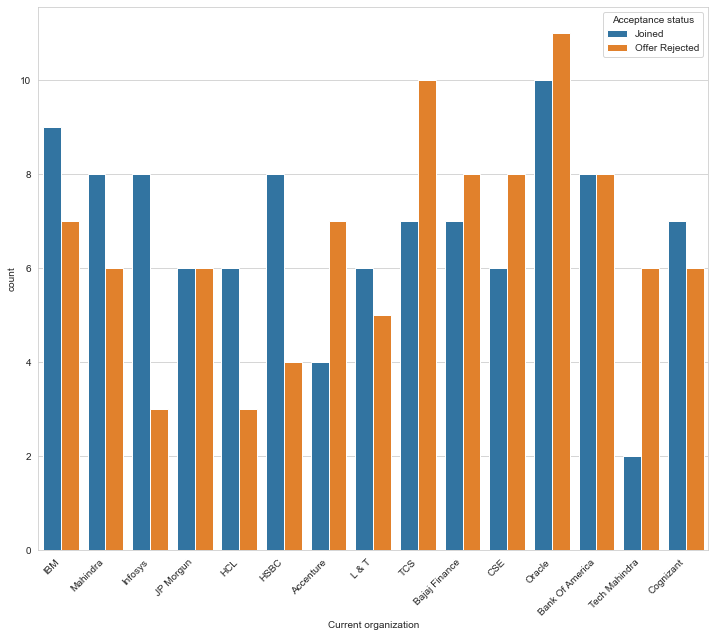

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
fig = sns.countplot(x='Current organization', hue='Acceptance status', data=df)
fig = fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

Organizations such as Oracle, Accenture,Bajaj Finance,Tech Mahindra,CSE and TCS have more rejections than acceptance. Organizations such as JP Morgan and Bank of America have equal Rejections and Acceptances. The rest of the organizations have more acceptances than rejections. 

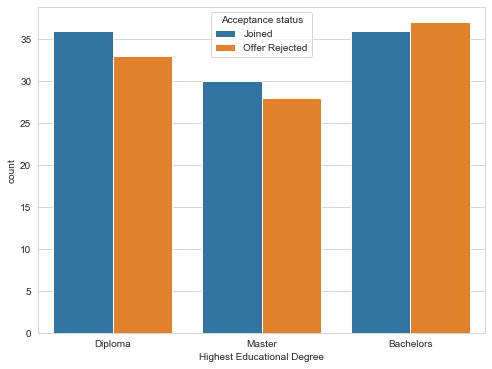

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(x='Highest Educational Degree', hue='Acceptance status', data=df)

Most of our dataset consists of candidates who have achieved their bachelors degree or Diploma, Fewer candidates have a master's degree. More candidates have accepted the job offer being Diploma and Master's degree holders.

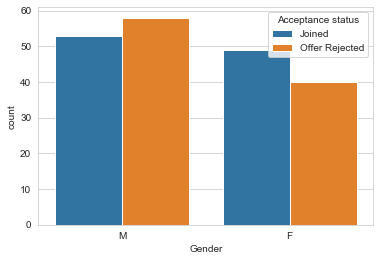

In [20]:
sns.set_style("whitegrid")
sns.countplot(x='Gender', hue='Acceptance status', data=df)

Gender is also a significant feature, acceptance status is high in Female than Male

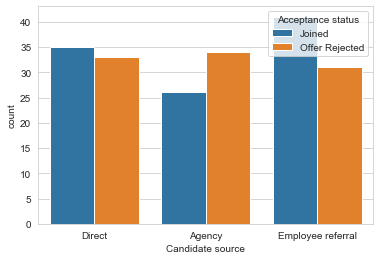

In [21]:
sns.set_style("whitegrid")
sns.countplot(x='Candidate source', hue='Acceptance status', data=df)

When the Candidate source is Employee referral, it has more acceptance than rejections. When its Agency there is more rejections than acceptance

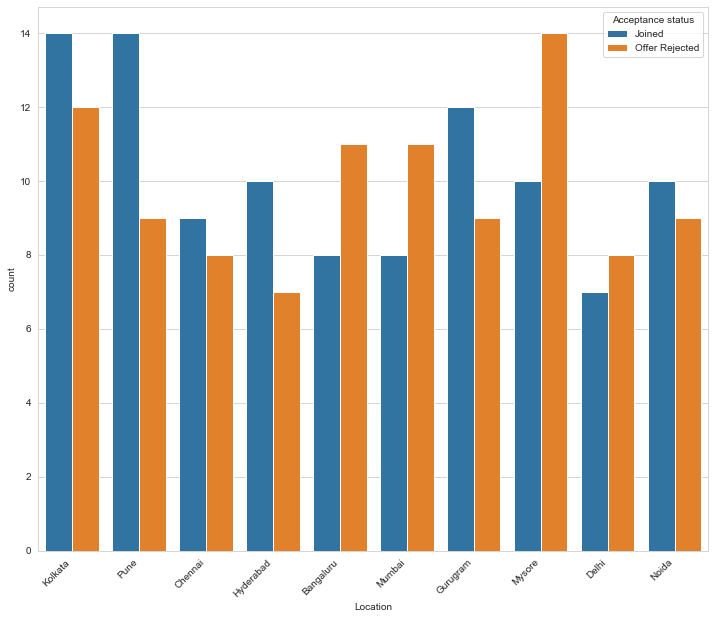

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
fig = sns.countplot(x='Location', hue='Acceptance status', data=df)
fig = fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

Candidate Locations such as Mysore, Bangalore, Mumbai, and Delhi have more Rejections than Acceptance. The rest of the Locations have more Acceptances than Rejections.

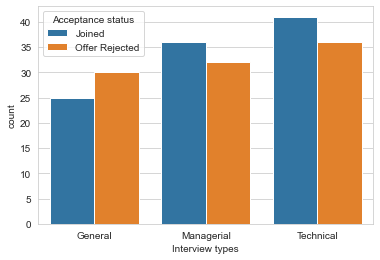

In [23]:
sns.set_style("whitegrid")
sns.countplot(x='Interview types', hue='Acceptance status', data=df)

Theres more acceptances when the interview type is Technical and Managerial rather than General.

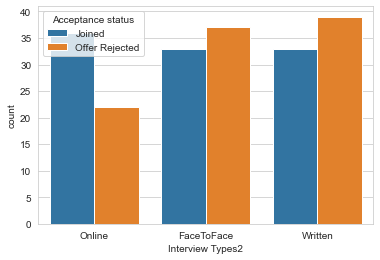

In [24]:
sns.set_style("whitegrid")
sns.countplot(x='Interview Types2', hue='Acceptance status', data=df)

Online interview type has more acceptances than rejections compared to Facetoface and Written.

<b> Useful Attributes = Offer band, LOB, Gender, Candidate relocation status, Candidate Source, Location, Interview Types2 </b><br>

<b> Plotting Scatterplots </b>

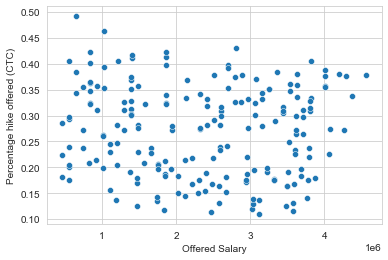

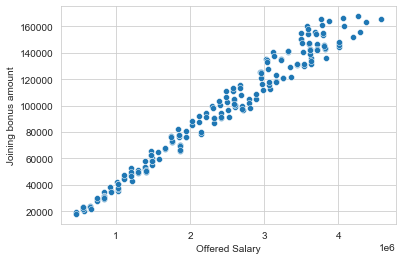

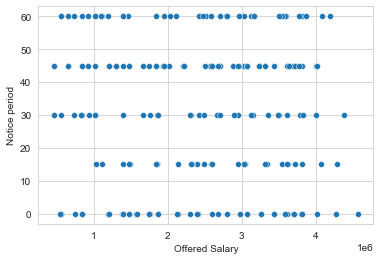

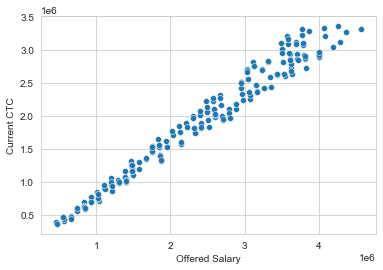

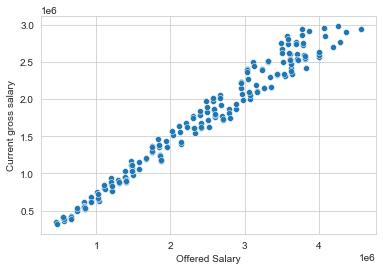

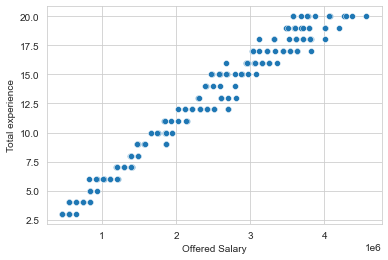

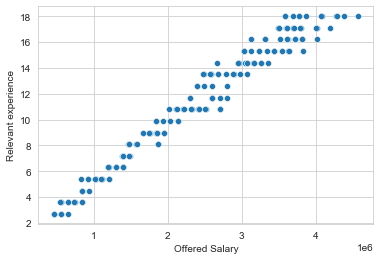

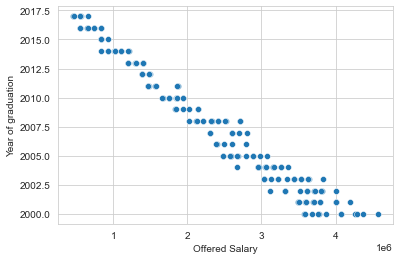

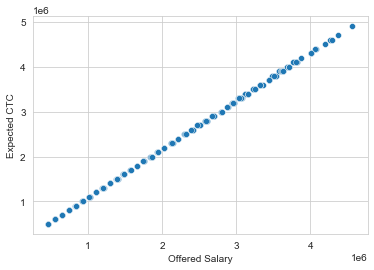

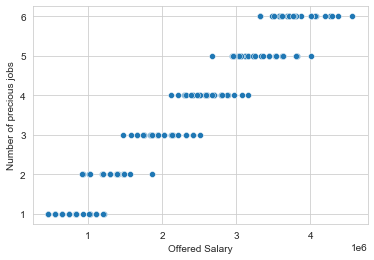

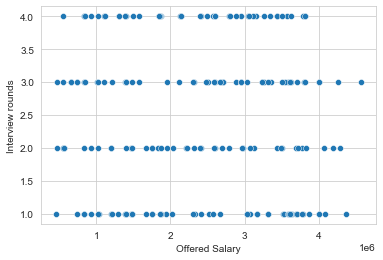

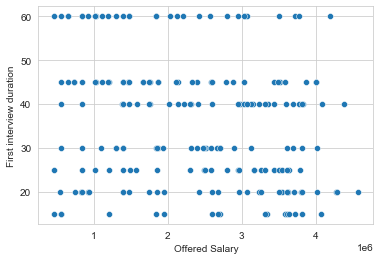

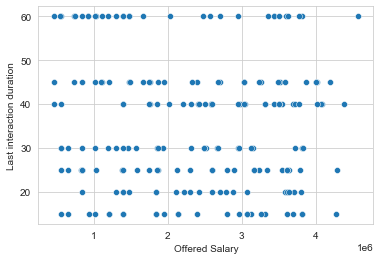

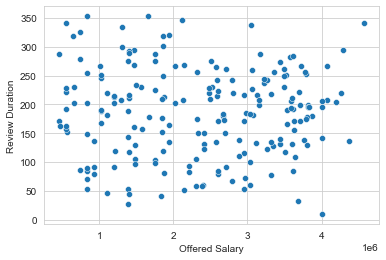

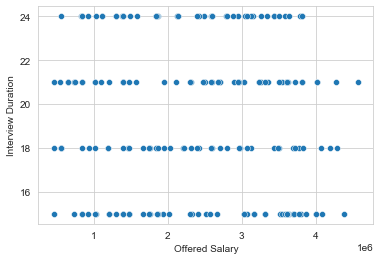

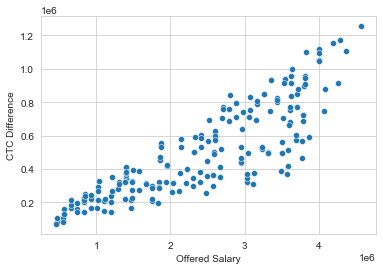

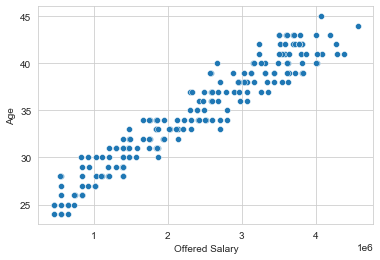

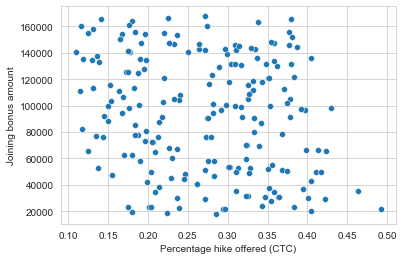

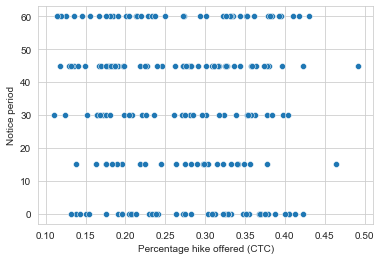

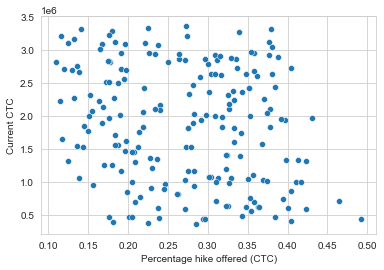

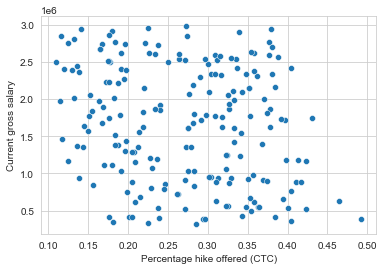

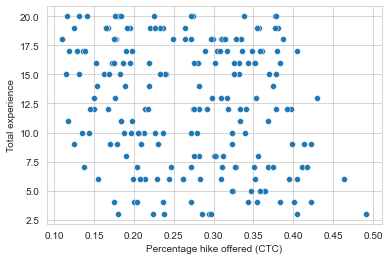

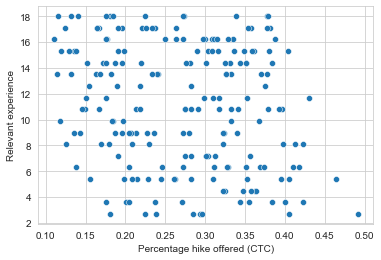

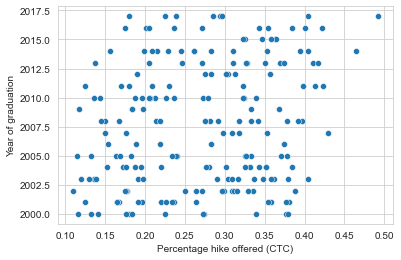

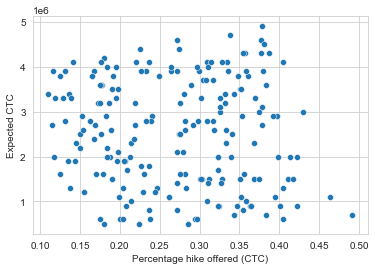

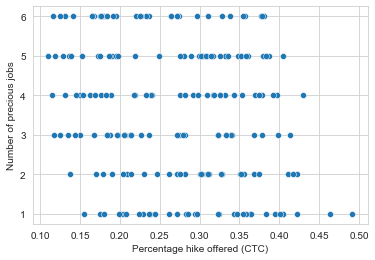

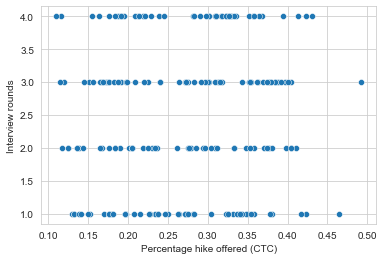

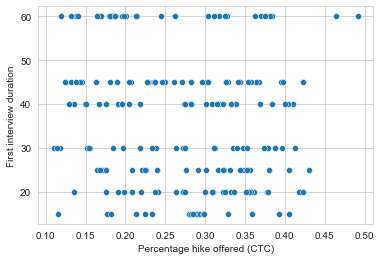

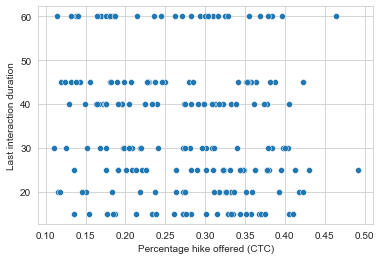

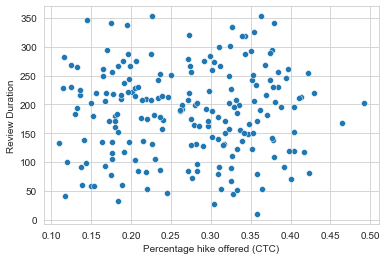

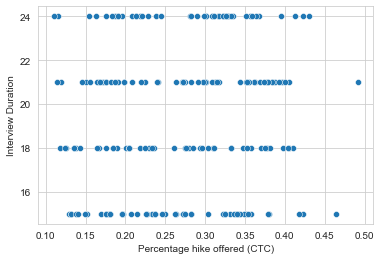

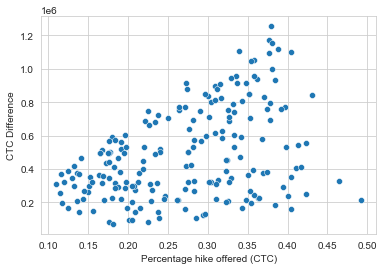

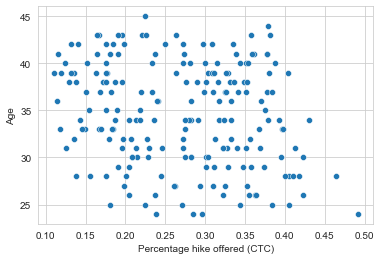

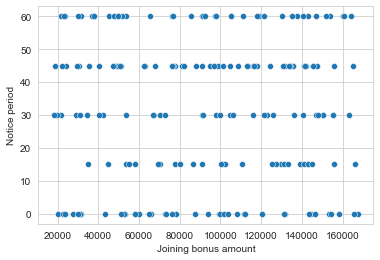

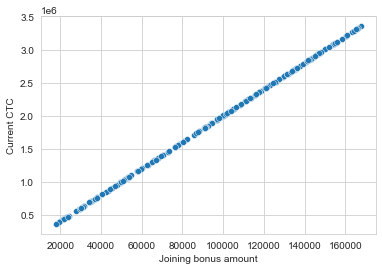

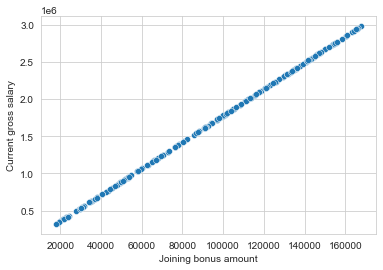

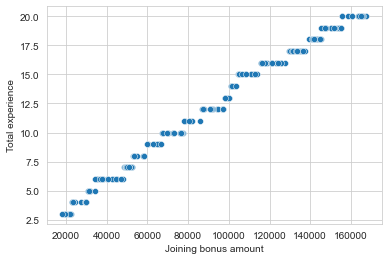

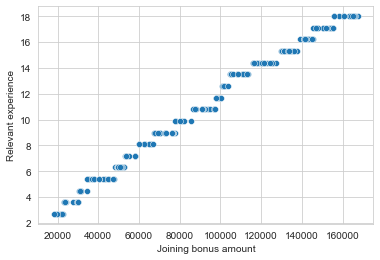

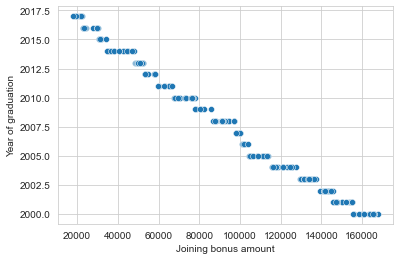

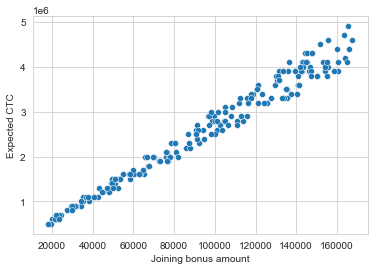

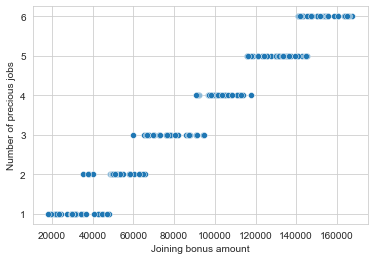

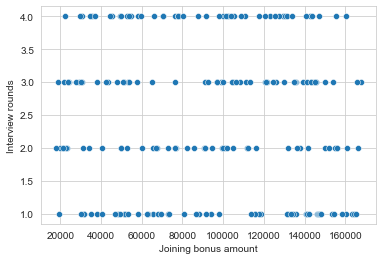

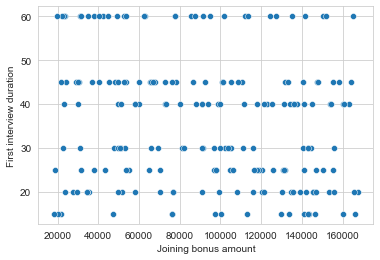

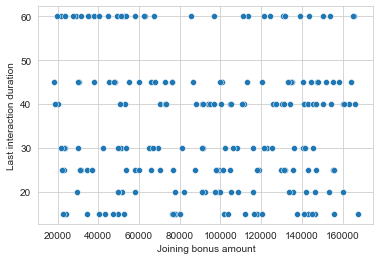

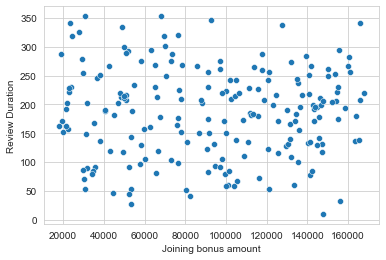

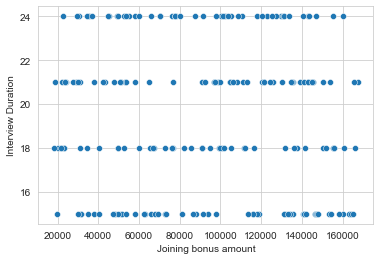

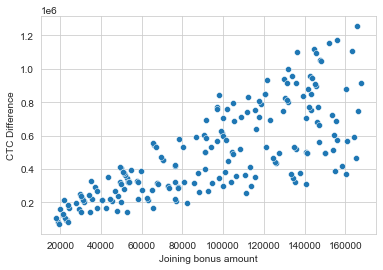

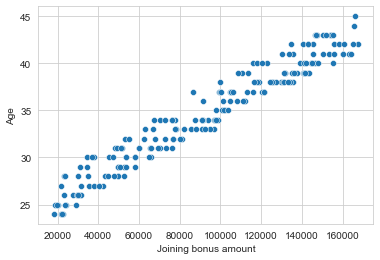

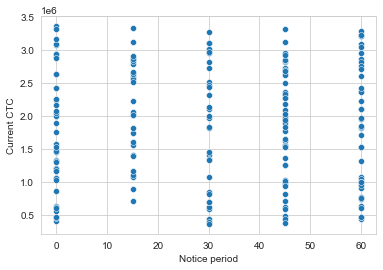

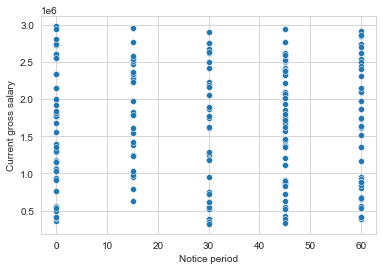

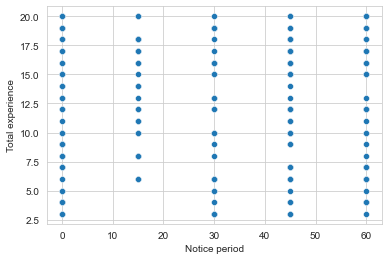

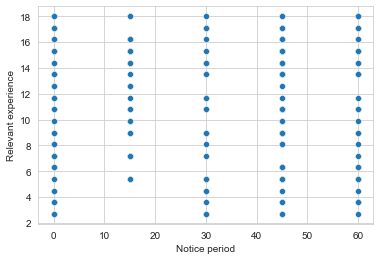

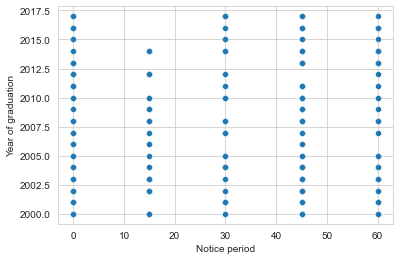

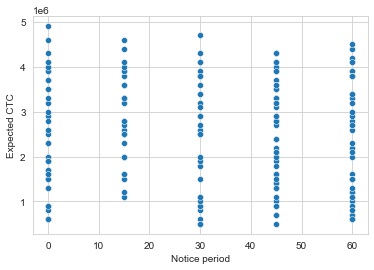

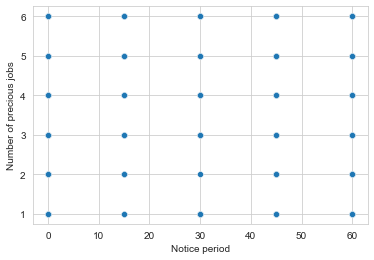

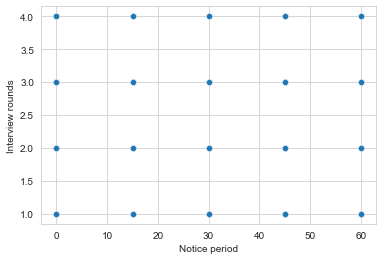

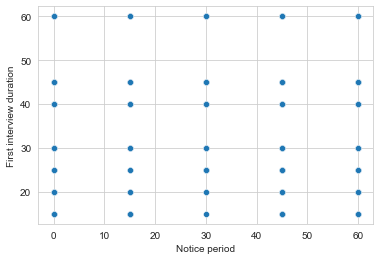

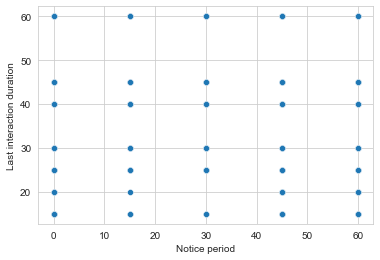

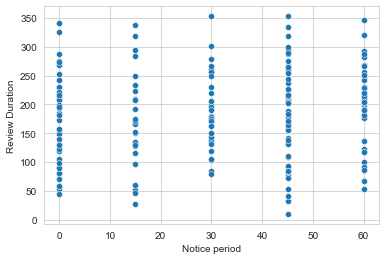

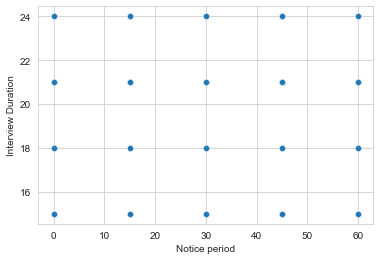

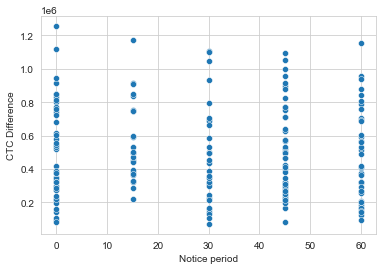

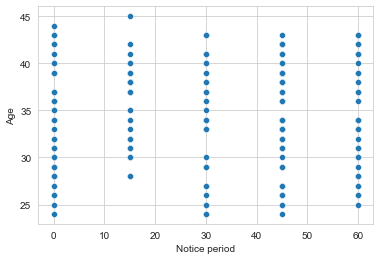

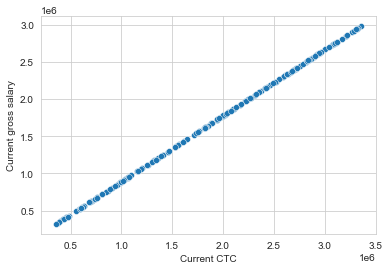

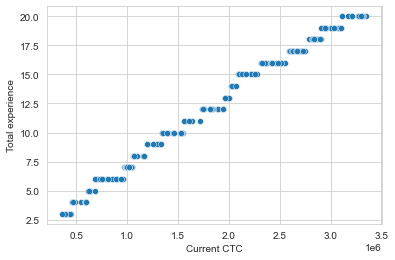

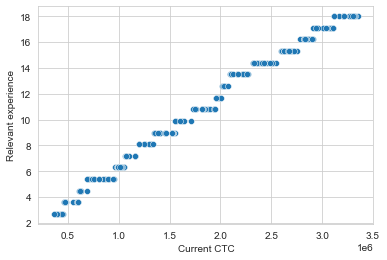

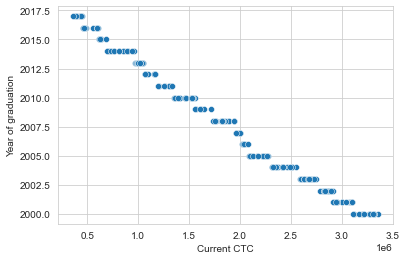

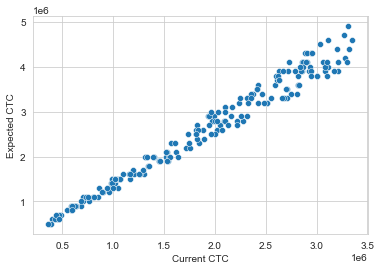

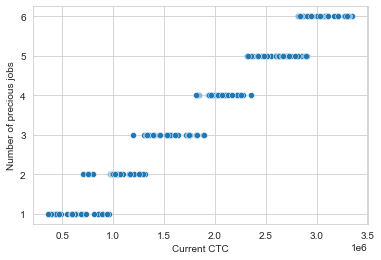

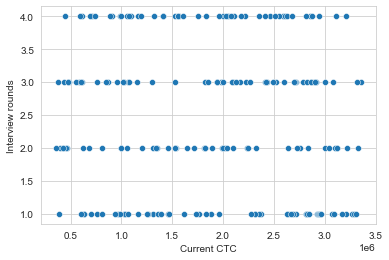

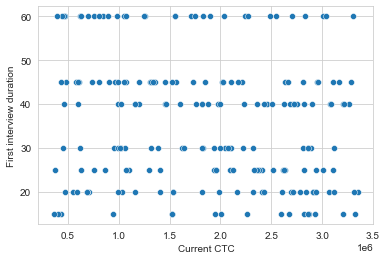

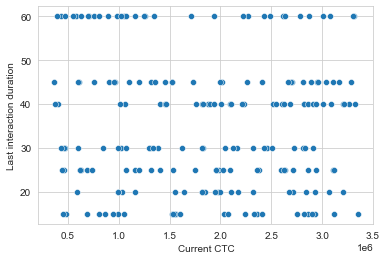

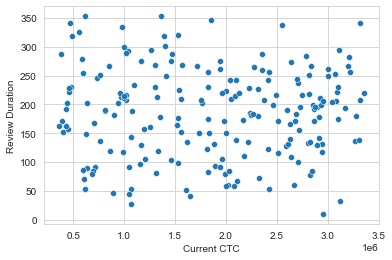

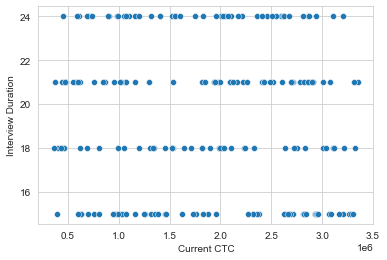

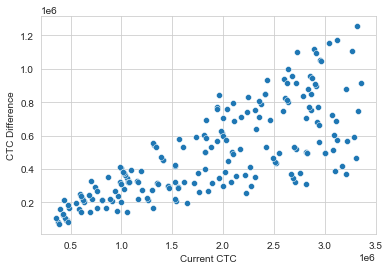

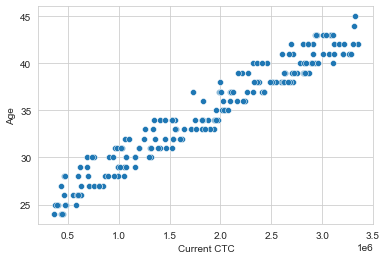

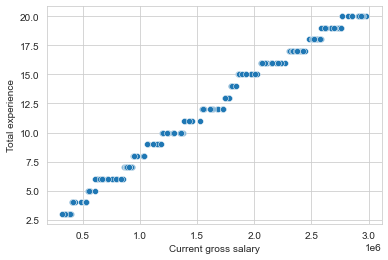

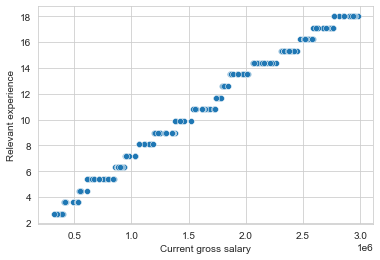

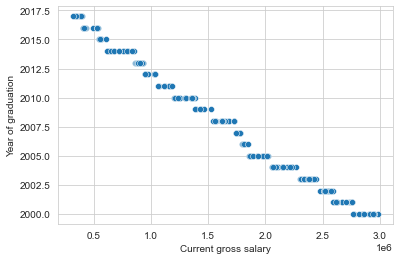

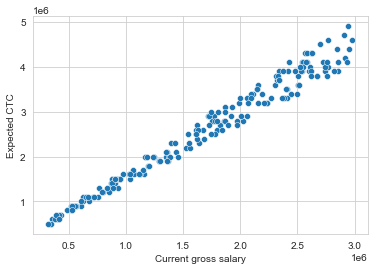

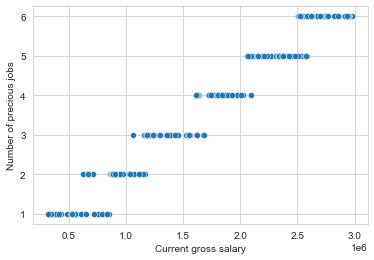

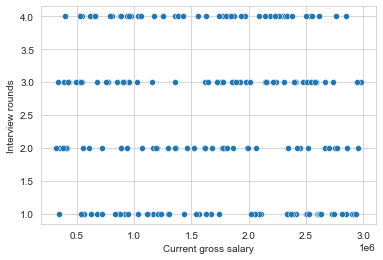

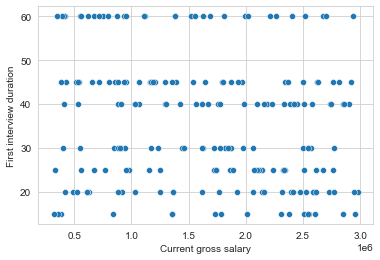

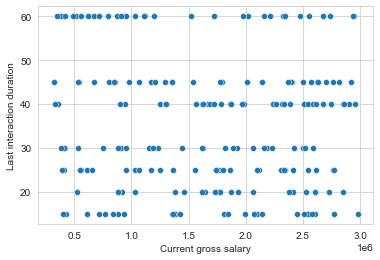

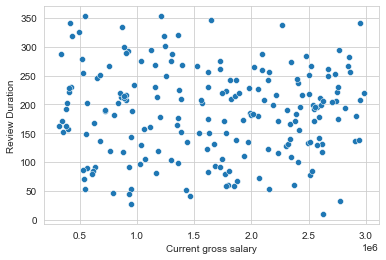

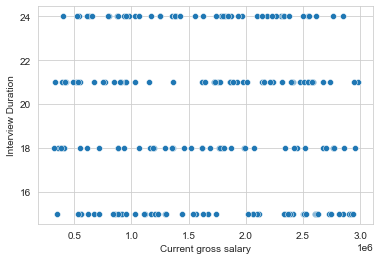

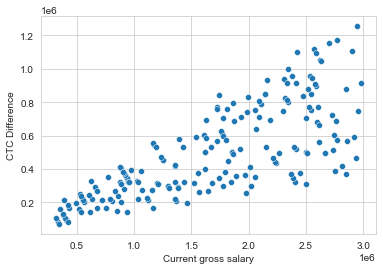

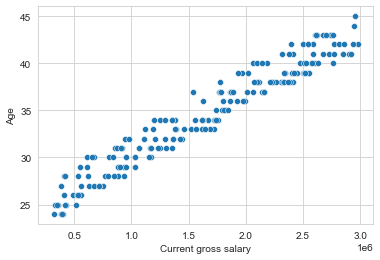

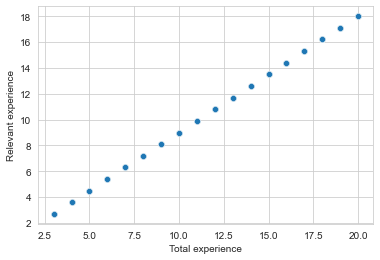

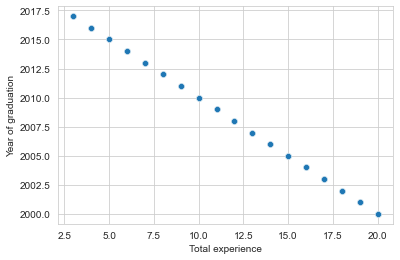

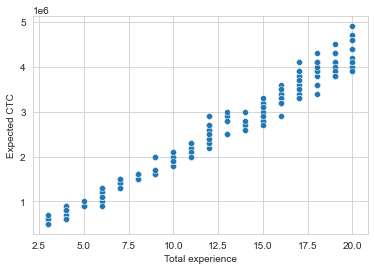

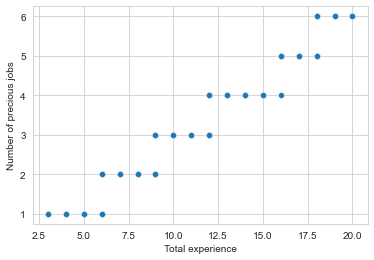

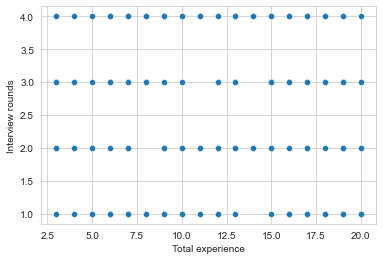

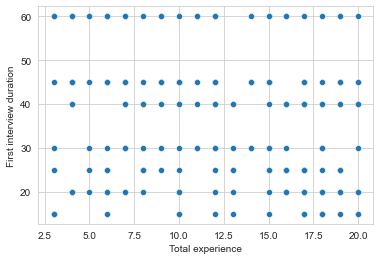

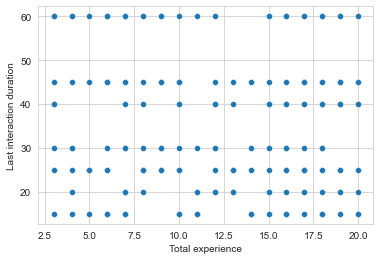

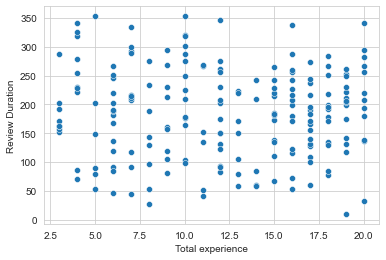

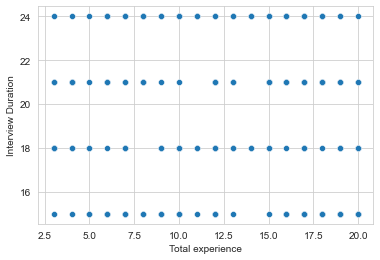

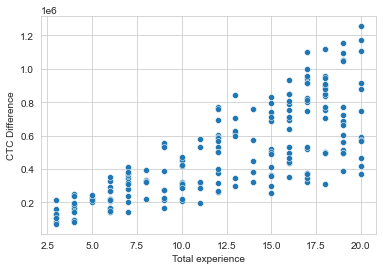

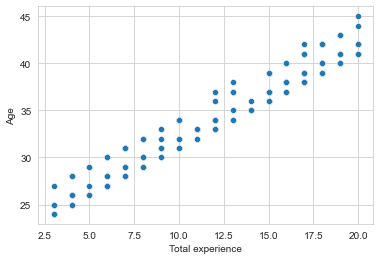

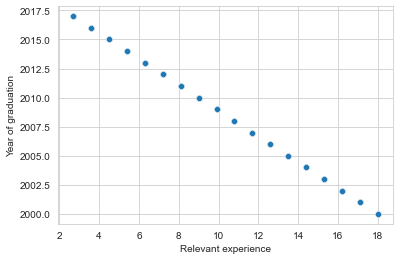

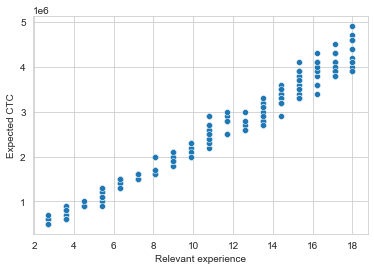

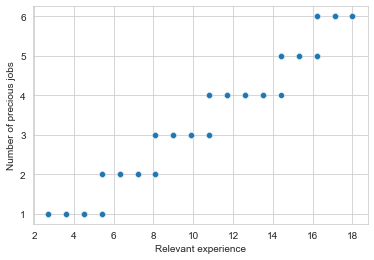

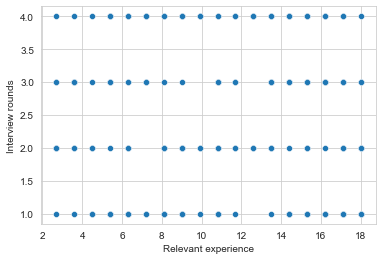

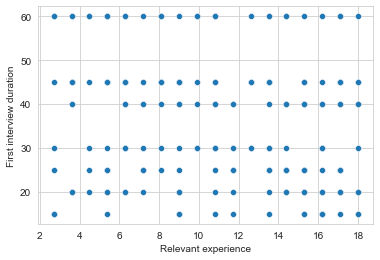

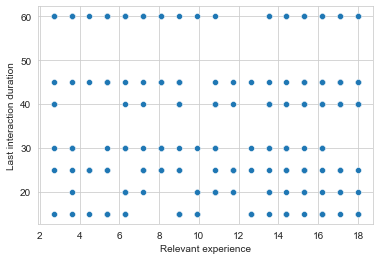

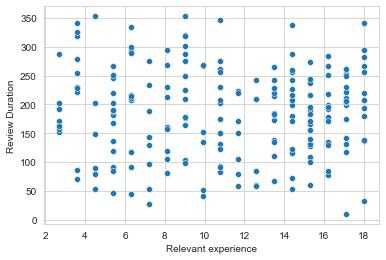

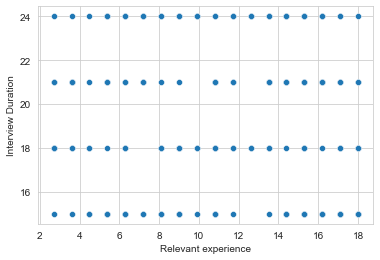

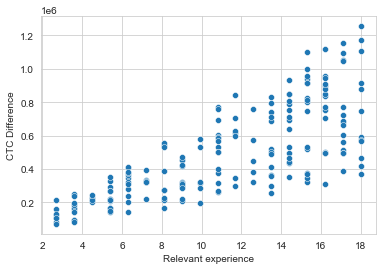

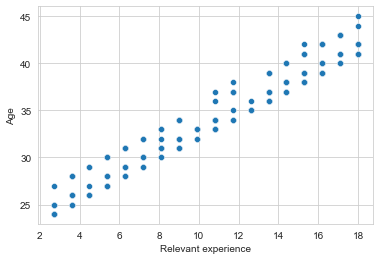

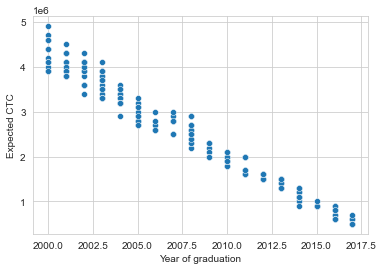

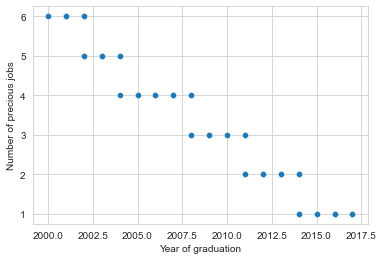

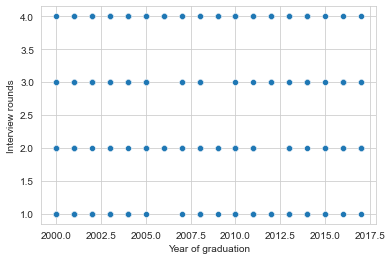

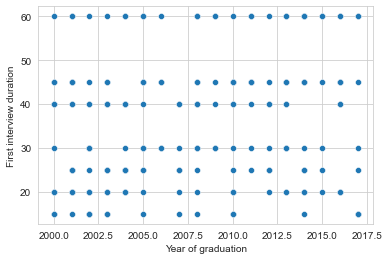

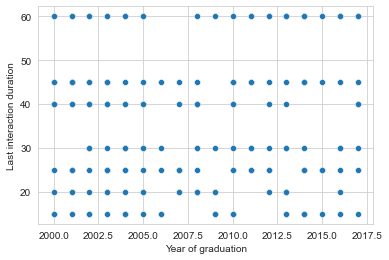

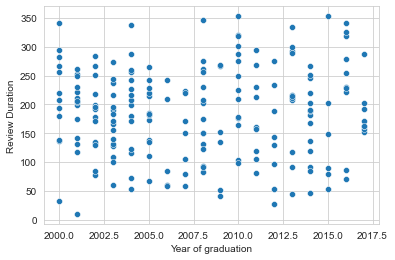

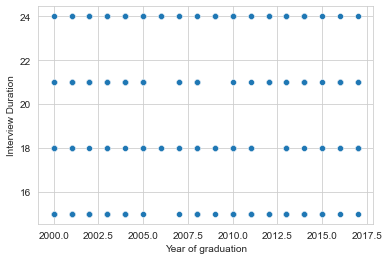

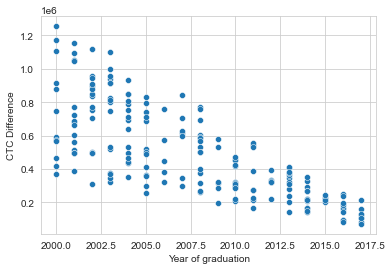

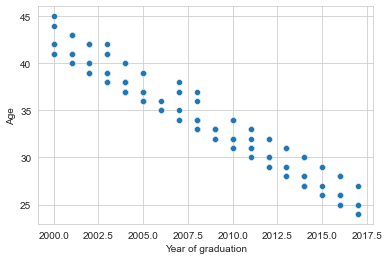

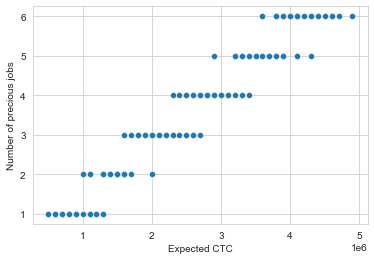

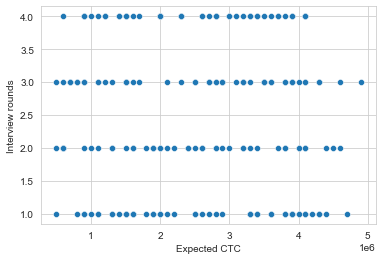

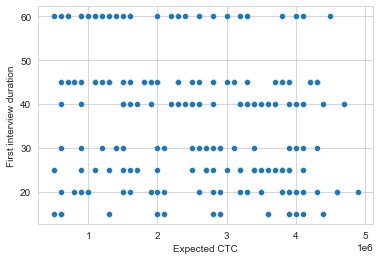

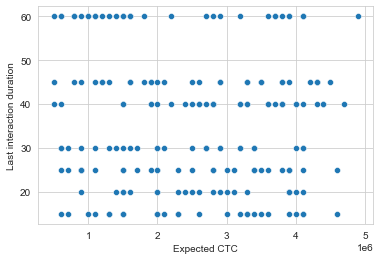

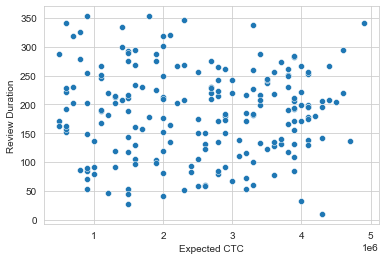

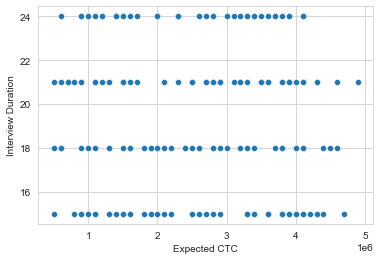

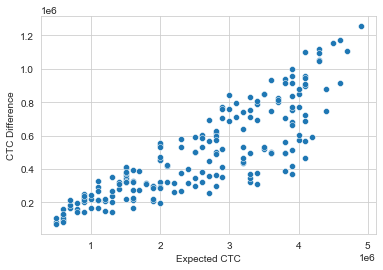

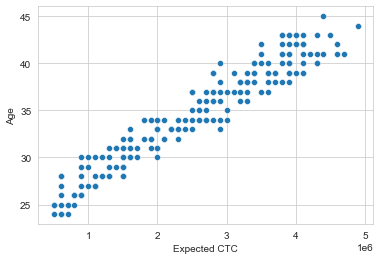

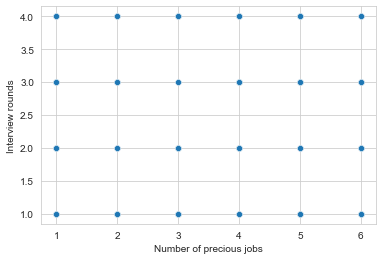

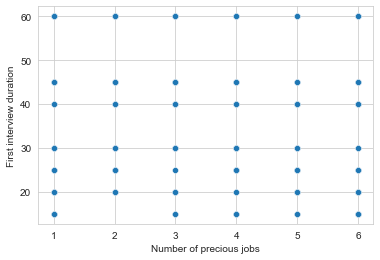

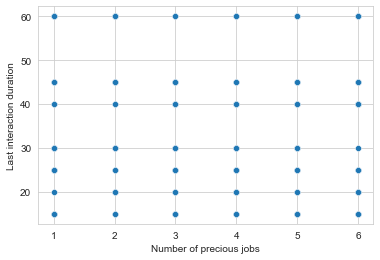

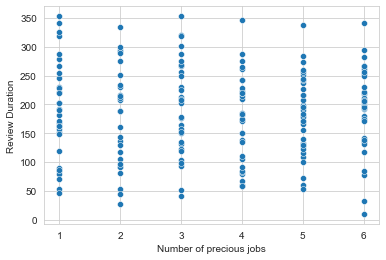

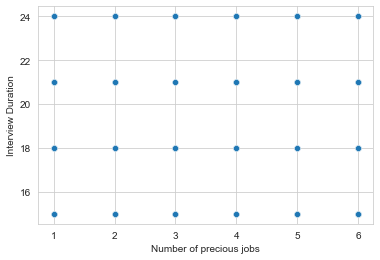

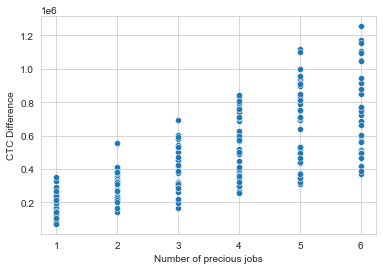

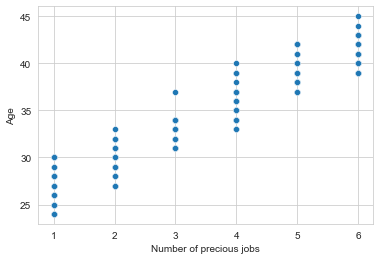

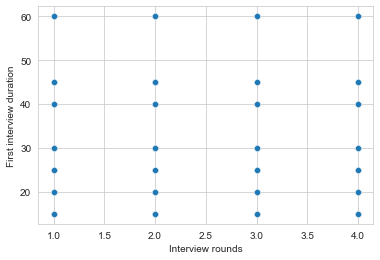

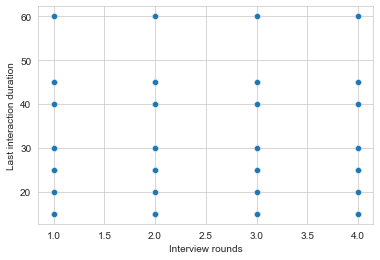

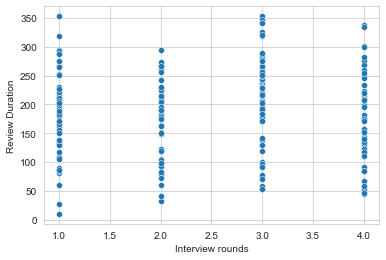

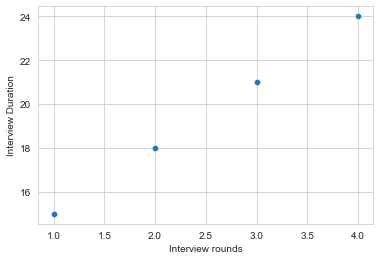

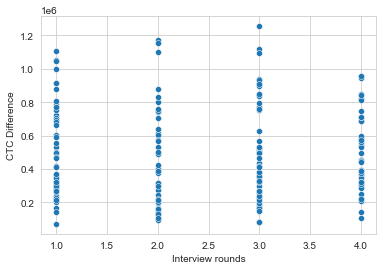

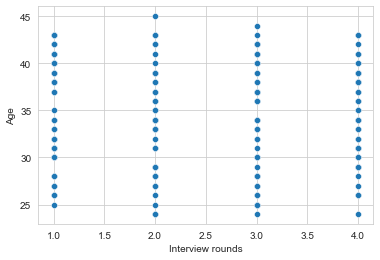

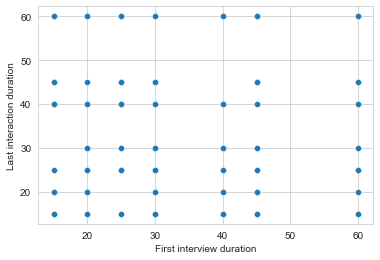

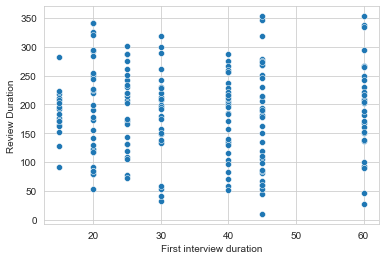

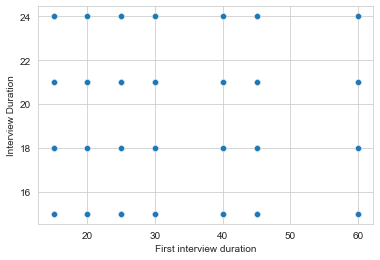

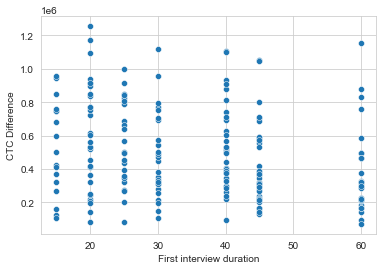

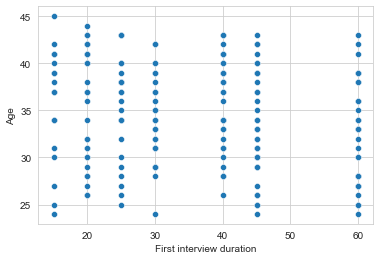

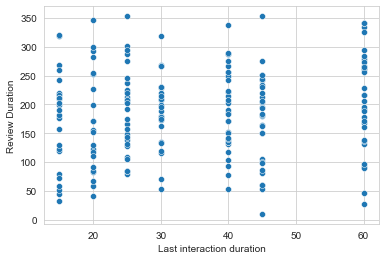

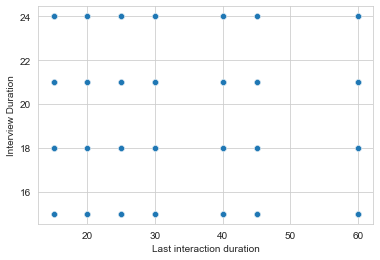

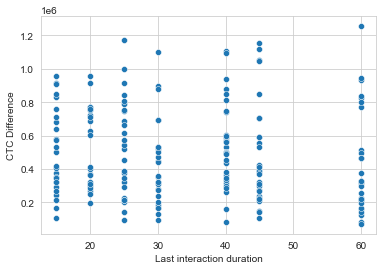

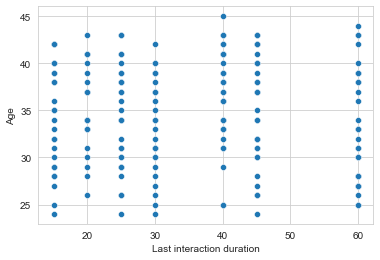

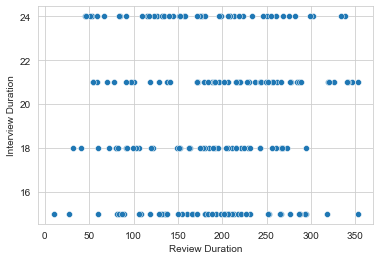

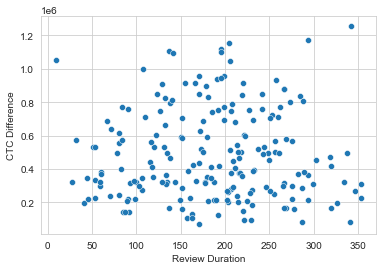

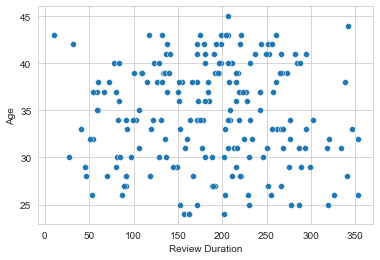

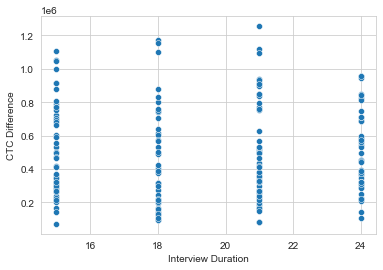

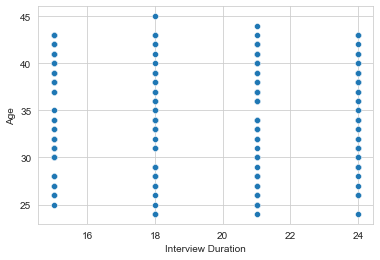

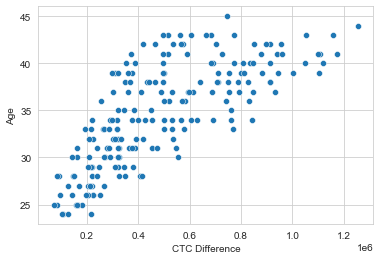

<Figure size 432x288 with 0 Axes>

In [25]:

import warnings 
warnings.filterwarnings('ignore')

for i in range(len(numerical)):
    for j in range(i+1, len(numerical)):
        x = sns.scatterplot(data = df, x = numerical[i], y = numerical[j])
        plt.figure()



<br> The results of the scatter plots generated are consistent with the results of the correlation matrix
</br>

### Cross Tabulations

In [26]:
for i in range(len(categorical)):
        x = pd.crosstab(df[categorical[i]],df['Acceptance status'])
        print(x)

Acceptance status  Joined  Offer Rejected
Offered band                             
B0                     12               6
B1                     10              10
B2                     18              11
B3                     11              24
B4                     12              13
B5                     16              15
C6                     23              19
Acceptance status  Joined  Offer Rejected
LOB                                      
Finance                29              26
IT                     59              61
Manufacturing          14              11
Acceptance status  Joined  Offer Rejected
Joining location                         
Chennai                23              21
Hyderabad              22              18
Mumbai                 18              18
NCR                    24              27
Pune                   15              14
Acceptance status            Joined  Offer Rejected
Candidate relocation status                        
No            

Not very significant differences noticed based on the above tables

# Section D: Feature Engineering

### Chi-Squared Test for categorical variables

In [27]:
#Importing libraries for chi squared
from sklearn.feature_selection import chi2
#Creating a dataframe of Categorical features after converting them to numeric - stdchi1
stdchi1= df_dum[['Offered band_B0','Offered band_B1','Offered band_B2','Offered band_B3','Offered band_B4','Offered band_B5','Offered band_C6','LOB_Finance','LOB_IT','LOB_Manufacturing','Joining location_Chennai','Joining location_Hyderabad','Joining location_Mumbai','Joining location_NCR','Joining location_Pune','Candidate relocation status_Yes','Current organization_Accenture','Current organization_Bajaj Finance','Current organization_Bank Of America','Current organization_CSE','Current organization_Cognizant','Current organization_HCL','Current organization_HSBC','Current organization_IBM','Current organization_Infosys','Current organization_JP Morgun','Current organization_L & T','Current organization_Mahindra','Current organization_Oracle','Current organization_TCS','Current organization_Tech Mahindra','Highest Educational Degree_Bachelors','Highest Educational Degree_Diploma','Highest Educational Degree_Master','Gender_F','Candidate source_Agency','Candidate source_Direct','Candidate source_Employee referral','Location_Bangaluru','Location_Chennai','Location_Delhi','Location_Gurugram','Location_Hyderabad','Location_Kolkata','Location_Mumbai','Location_Mysore','Location_Noida','Location_Pune','Interview types_General','Interview types_Managerial','Interview types_Technical','Interview Types2_FaceToFace','Interview Types2_Online','Interview Types2_Written']]
#Creating a dataframe of the target variable Acceptance status - stdchi2
stdchi2 = df_dum['Acceptance status_Joined']

Offered band_B5                         0.004660
Current organization_JP Morgun          0.004802
Candidate source_Direct                 0.006026
Joining location_Pune                   0.006085
Current organization_Bank Of America    0.006403
Offered band_B1                         0.008003
Highest Educational Degree_Master       0.012170
Joining location_Mumbai                 0.014406
Location_Noida                          0.020240
Location_Chennai                        0.025634
Joining location_Chennai                0.028520
Highest Educational Degree_Diploma      0.038050
Current organization_Cognizant          0.042140
Current organization_L & T              0.055331
LOB_Finance                             0.065663
Highest Educational Degree_Bachelors    0.082932
Location_Kolkata                        0.084280
Offered band_B4                         0.090036
Current organization_Oracle             0.096057
Interview types_Managerial              0.102535
Current organization

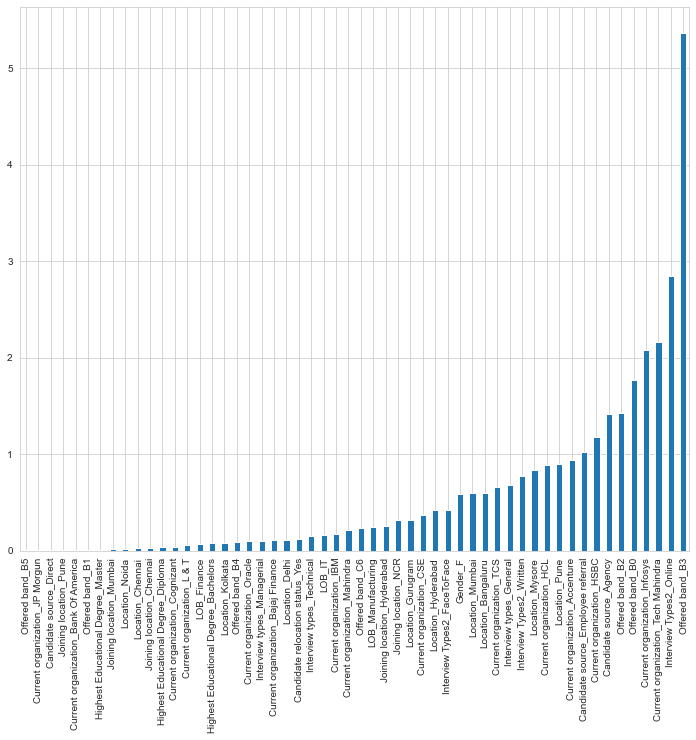

In [28]:
# Computing Chi squared scores 
chi_scores = chi2(stdchi1,stdchi2)

# Computing p value
p_value = pd.Series(chi_scores[1], index = stdchi1.columns) 
# Sorting P value in descending order
p_value.sort_values(ascending = False, inplace = True)


chi_value = pd.Series(chi_scores[0], index = stdchi1.columns) 
# Sorting P value in descending order
chi_value.sort_values(ascending = True, inplace = True)

print(chi_value)
plt.figure(figsize=(12,10))
chi_value.plot.bar()

<b> The results show that most of the candidates who had been given Band 3 and given an interview online had Accepted the job offer <b>

In [29]:
dfn2 = df[categorical]

In [30]:
# Label Encoding categorical Data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [31]:
for i in range(len(categorical)):
    dfn2[categorical[i]] = label_encoder.fit_transform(df[categorical[i]])



Candidate source               1.488414
Gender                         0.469813
Interview types                0.411848
Location                       0.342308
Offered band                   0.276110
Joining location               0.195103
Current organization           0.125061
Candidate relocation status    0.119453
Highest Educational Degree     0.058888
Interview Types2               0.020610
LOB                            0.002118
dtype: float64


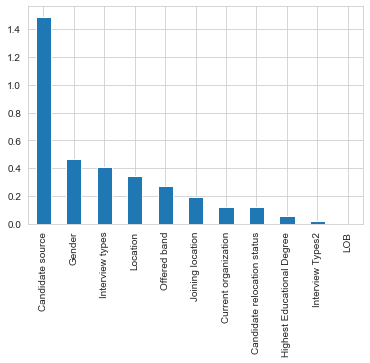

In [32]:
# Computing Chi squared scores 
chi_scores = chi2(dfn2,stdchi2)

# Computing p value
p_value = pd.Series(chi_scores[1], index = dfn2.columns) 
# Sorting P value in descending order
p_value.sort_values(ascending = False, inplace = True)


chi_value = pd.Series(chi_scores[0], index = dfn2.columns) 
# Sorting P value in descending order
chi_value.sort_values(ascending = False, inplace = True)

print(chi_value)

chi_value.plot.bar()


High Chi Score means the feature variable is more dependent on the target variable. Its observed that Candidate source, Gender, Interview types, Location and Offered band are the most important features categorical features

### Mutual Information Gain used for Continous Features

CTC Difference                   0.069176
Relevant experience              0.062211
Age                              0.061312
Review Duration                  0.054472
Percentage hike offered (CTC)    0.044030
First interview duration         0.029652
Interview Duration               0.029302
Year of graduation               0.022071
Total experience                 0.013977
Number of precious jobs          0.007478
Notice period                    0.002806
Expected CTC                     0.000000
Interview rounds                 0.000000
Current gross salary             0.000000
Current CTC                      0.000000
Joining bonus amount             0.000000
Last interaction duration        0.000000
Offered Salary                   0.000000
dtype: float64


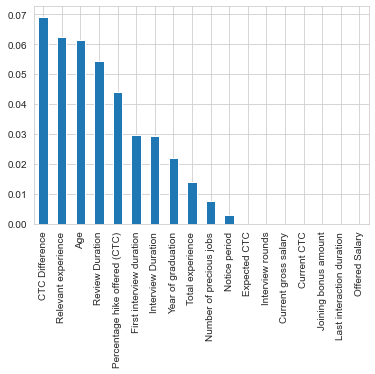

In [33]:
from sklearn.feature_selection import mutual_info_classif
threshold = 5  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(df[numerical], df_dum['Acceptance status_Joined'], random_state=0)
p_value = pd.Series(feature_scores, index = df[numerical].columns) 
# Sorting P value in descending order
p_value.sort_values(ascending = False, inplace = True)
print(p_value)

p_value.plot.bar()


Higher the Information gain better the feature in predicting the target variable. CTC difference, Relevant experience, Age, Review Duration, Percentage Hike offered, Interview Duration and Year of graduation have the most information gain amongst the numerical features.

### Recursive Feature Selection

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd

import warnings
warnings.filterwarnings('ignore')



In [35]:
X = df_dum.drop(['Acceptance status_Joined','Date of first Interview','Date of last Interview','DOB','Written Test Date','Date of Application','Date of Interview','Date of Job Offer','Date of Offer extension','Date of Joining','Candidate ID'],axis = 1)
y = stdchi2

print("Actual Values\n",X.iloc[0,:])

# Create the sbs object and select best 4 features
knn = KNeighborsClassifier(n_neighbors=4)
# forward parameter will do sequential backward selection when it is set to False 
sbs = SFS(knn,
           k_features=4,
           forward=False,
           scoring='accuracy')

sbs = sbs.fit(X, y)
print("Best 4 features: ",sbs.k_feature_idx_)

Actual Values
 Offered Salary                   1.383755e+06
Percentage hike offered (CTC)    1.903829e-01
Joining bonus amount             5.812228e+04
Notice period                    0.000000e+00
Current CTC                      1.162446e+06
                                     ...     
Interview types_Managerial       0.000000e+00
Interview types_Technical        0.000000e+00
Interview Types2_FaceToFace      0.000000e+00
Interview Types2_Online          1.000000e+00
Interview Types2_Written         0.000000e+00
Name: 0, Length: 75, dtype: float64
Best 4 features:  (1, 2, 3, 4)


In [36]:
X.head()

,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Number of precious jobs,Interview rounds,First interview duration,Last interaction duration,Review Duration,Interview Duration,Days Difference,Hike Difference,CTC Difference,Age,Offered band_B0,Offered band_B1,Offered band_B2,Offered band_B3,Offered band_B4,Offered band_B5,Offered band_C6,LOB_Finance,LOB_IT,LOB_Manufacturing,Joining location_Chennai,Joining location_Hyderabad,Joining location_Mumbai,Joining location_NCR,Joining location_Pune,Candidate relocation status_Yes,Current organization_Accenture,Current organization_Bajaj Finance,Current organization_Bank Of America,Current organization_CSE,Current organization_Cognizant,Current organization_HCL,Current organization_HSBC,Current organization_IBM,Current organization_Infosys,Current organization_JP Morgun,Current organization_L & T,Current organization_Mahindra,Current organization_Oracle,Current organization_TCS,Current organization_Tech Mahindra,Highest Educational Degree_Bachelors,Highest Educational Degree_Diploma,Highest Educational Degree_Master,Gender_F,Candidate source_Agency,Candidate source_Direct,Candidate source_Employee referral,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurugram,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Mysore,Location_Noida,Location_Pune,Interview types_General,Interview types_Managerial,Interview types_Technical,Interview Types2_FaceToFace,Interview Types2_Online,Interview Types2_Written
0,1.383755e+06,0.190383,58122.28125,0,1162445.625,1033285,8,7.2,2012,1500000,0.290383,2,4,40,25,275,24,-22,-0.1,221309.8125,29.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,2.976590e+06,0.332342,111705.13125,0,2234102.625,1985869,15,13.5,2005,3200000,0.432342,4,2,40,40,185,18,-22,-0.1,742487.1125,36.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,7.416631e+05,0.271345,29168.43750,30,583368.750,518550,4,3.6,2016,800000,0.371345,1,3,45,60,278,21,-7,-0.1,158294.3750,25.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,4.079724e+06,0.273813,160138.23750,60,3202764.750,2846902,20,18.0,2000,4400000,0.373813,6,1,40,40,266,15,-7,-0.1,876958.7750,41.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,3.340936e+06,0.289619,129531.88125,15,2590637.625,2302789,17,15.3,2003,3600000,0.389619,5,4,15,25,127,24,-7,-0.1,750298.6125,38.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


Recursive feature selection uses a wrapper-based approach to select the best subset of features among the data. Offered Salary, Percentage Hike Offered, Joining bonus amount, Notice period, Current CTC, Total Experience and Expected CTC are observed to be the best features using this approach.

# Section E: Model Building Diagnostics

<b> Logistic Regression Model using the all the features </b>

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy of logistic regression classifier on test set: 0.43
              precision    recall  f1-score   support

           0       0.38      0.46      0.41        26
           1       0.50      0.41      0.45        34

    accuracy                           0.43        60
   macro avg       0.44      0.44      0.43        60
weighted avg       0.45      0.43      0.44        60



<b> Logistic Regression Model using the features selected from Chi Square and Mutual Information Gain <b>

In [39]:
#x2= df_dum[['Offered band_B0','Offered band_B1','Offered band_B2','Offered band_B3','Offered band_B4','Offered band_B5','Offered band_C6','Gender_F','Candidate source_Agency','Candidate source_Direct','Candidate source_Employee referral','Location_Bangaluru','Location_Chennai','Location_Delhi','Location_Gurugram','Location_Hyderabad','Location_Kolkata','Location_Mumbai','Location_Mysore','Location_Noida','Location_Pune','Interview types_General','Interview types_Managerial','Interview types_Technical','CTC Difference', 'Relevant experience', 'Age', 'Review Duration', 'Percentage hike offered (CTC)', 'Interview Duration','Year of graduation']]
#x2 = x2= df_dum[['Gender_F','Candidate source_Agency','Candidate source_Direct','Candidate source_Employee referral','Location_Bangaluru','Location_Chennai','Location_Delhi','Location_Gurugram','Location_Hyderabad','Location_Kolkata','Location_Mumbai','Location_Mysore','Location_Noida','Location_Pune','Interview types_General','Interview types_Managerial','Interview types_Technical','CTC Difference', 'Relevant experience', 'Age', 'Review Duration']]
x2 = df_dum[['Gender_F','Candidate source_Agency','Candidate source_Direct','Candidate source_Employee referral','CTC Difference', 'Relevant experience', 'Age', 'Review Duration', 'Percentage hike offered (CTC)','Interview Duration']]




In [40]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.1, random_state=0)
logreg2 = LogisticRegression(solver='liblinear',C=10.0,random_state=0)
logreg2.fit(X2_train, y2_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [41]:
y_pred = logreg2.predict(X2_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X2_test, y2_test)))
print(classification_report(y2_test, y_pred))


Accuracy of logistic regression classifier on test set: 0.50
              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.54      0.64      0.58        11

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.49      0.50      0.49        20



<b> Logistic Regression Model using the features selected from Recursive Feature Selection </b>

In [42]:
#x3 = df_dum[['Offered Salary', 'Percentage hike offered (CTC)', 'Joining bonus amount', 'Notice period', 'Current CTC', 'Total experience','Expected CTC' ]]
x3 = df_dum[['Offered Salary', 'Percentage hike offered (CTC)', 'Joining bonus amount', 'Notice period']]

In [43]:
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.1, random_state=0)
logreg2 = LogisticRegression(C=10.0, random_state=0, solver='liblinear')
logreg2.fit(X3_train, y3_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [44]:
y_pred = logreg2.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X3_test, y3_test)))
print(classification_report(y3_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.45
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         9
           1       0.00      0.00      0.00        11

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20



<b> Summary of the results </b><br>
The results show that the Logistic Regression Model implemented using the features selected from filter based approaches namely Chi Square and Mutual Informartion Gain have the highest model accuracy.
This model used the following numerical features:
01. 'CTC Difference'
02. 'Relevant experience'
03. 'Age'
04. 'Review Duration'
05. 'Percentage hike offered (CTC)'
06. 'Interview Duration' 

and the following categorical features:
01. 'Gender' 
02. 'Candidate source'. 

Model accuracy could've been higher if more training data was used. The Dataset provided was limited to 200 records only.
</br>
  